## CBD PROJECT

- <a href='#intro'>1. Introduction</a>
- <a href='#2'>2. Libraries and datasets</a>
     - <a href='#21'>2.1 Import libraries and packages</a>
     - <a href='#22'>2.2 Import data</a>
- <a href='#3'>3. Data description and distribution</a>
    - <a href='#31'>3.1. Data description</a> 
    - <a href='#32'>3.2. Data distribution</a>
- <a href='#4'>4. Data evaluation and reduction</a>
    - <a href='#41'>4.1. Correlation</a>
    - <a href='#42'>4.2. Scaling</a> 
    - <a href='#43'>4.3. PCA: Principal Component Analysis</a> 
- <a href='#5'>5. Model: K-Means Clustering</a>
    - <a href='#51'>5.1. Model set up</a>
    - <a href='#52'>5.2. Finding optimal number of clusters: Elbow Method</a>
- <a href='#6'>6. Cluster analysis</a>
    - <a href='#61'>6.1. Cluster plotting and visualisation</a>
    - <a href='#62'>6.2. Cluster characteristics</a>
    - <a href='#63'>6.3. Cluster descriptions</a>
    - <a href='#64'>6.4. Clusters and their location in the world</a>   
- <a href='#7'>7. Further analysis to complement clustering </a>
    - <a href='#71'>7.1. Dropping features with high correlation</a>   
    - <a href='#72'>7.2. Further analysis of clusters</a>  
    - <a href='#73'>7.3. Linear and Multivariate regression</a>
        - <a href='#73a'>7.3.a. Linear regression</a>
        - <a href='#73b'>7.3.b. Multivariate regression</a>
    - <a href='#74'>7.4. Further clustering of clusters</a>   
- <a href='#8'>8. Answer to the question and learnings</a>
- <a href='#9'>9. References</a>

## <a id='intro'>1. Introduction</a>

**Background**

According to the **International Monetary Fund (IMF)**, *`development aid`* is aid given by governments and other agencies to support the economic, environmental, social, and political development of developing countries.


**Problem Statement (taken from Dataset)**

HELP International have been able to raise around 10 million dollars. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. 

So, the CEO has to make decision to choose the countries that are in the direst need of aid. 

Hence, the goal is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

### Which countries should receive the funding and why?

## <a id='2'>2. Libraries and datasets</a>

### <a id='21'>2.1. Import libraries and packages</a>

In [1]:
# to download the datasets
!pip install opendatasets --quiet

import opendatasets as od
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# kmeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# multivariate linear regression
from sklearn import linear_model

# geo data
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
import plotly.express as px;

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


### <a id='22'>2.2. Importing the dataset</a>

In [2]:
dataset_url = "https://www.kaggle.com/datasets/pyarju/cbd-project"
od.download(dataset_url)
#{"username":"pyarju","key":"c8a694149fc42bd17c2edd2792a41f35"}

Skipping, found downloaded files in "./cbd-project" (use force=True to force download)


In [3]:
dataset_path = './cbd-project/country_data'

In [4]:
#list the files in the directory
os.listdir(dataset_path)

['data-dictionary.csv', 'Country-data.csv']

In [5]:
# read the csv file
raw_dataset = pd.read_csv(
    f'{dataset_path}/Country-data.csv')

In [6]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## <a id='3'>3. Dataset description and distribution</a>

### <a id='31'>3.1. Dataset description</a>

**Feature Description** 

* country:      Name of the country

* child_mort:   Death of children under 5 years of age per 1000 live births

* exports:      Exports of goods and services per capita. Given as percentage of the GDP per capita

* health:       Total health spending per capita. Given as percentage of GDP per capita

* imports:      Imports of goods and services per capita. Given as percentage of the GDP per capita

* Income:       Net income per person

* Inflation:    The measurement of the annual growth rate of the Total GDP

* life_expec:   The average number of years a new born child would live if the current mortality patterns are to remain the same

* total_fer:    The number of children that would be born to each woman if the current age-fertility rates remain the same

* gdpp:         The GDP per capita. Calculated as the Total GDP divided by the total population

In [7]:
 raw_dataset.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [8]:
# shape of the dataset
raw_dataset.shape

(167, 10)

In [9]:
# checking for any missing values?
raw_dataset.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
# checking for any duplicate values?
format(len(raw_dataset[raw_dataset.duplicated()]))

'0'

In [11]:
# statistical measures
raw_dataset.describe(percentiles = [.25, .5, .75, .90 ,.95, .99])

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
90%    100.220000   70.800000   10.940000   75.420000   41220.000000   
95%    116.000000   80.570000   11.570000   81.140000   48290.000000   
99%    153.400000  160.480000   13.474000  146.080000   84374.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
90%     16.640000   80.400000    5.322000   41840.000000  
95%     20.870000   81.400000    5.861000   48610.000000  
99%     41.478000   82.370000    6.563600   79088.000000  
max    104.000000   82.800000    7.490000  105000.000000

**Findings**

* The dataset is small
* There are no missing values
* There are no duplicate values
* There are some outliers and skewed distribution

### <a id='32'>3.2. Dataset distribution</a>

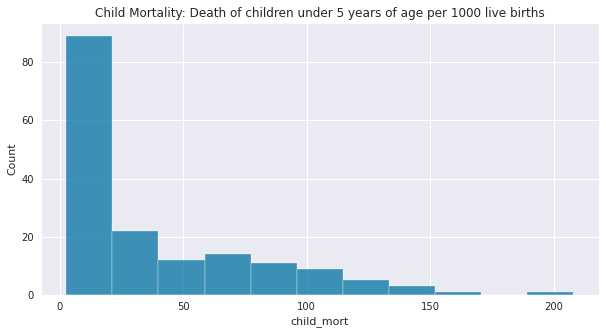

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
plt.title("Child Mortality: Death of children under 5 years of age per 1000 live births")
ax = sns.histplot(raw_dataset["child_mort"])

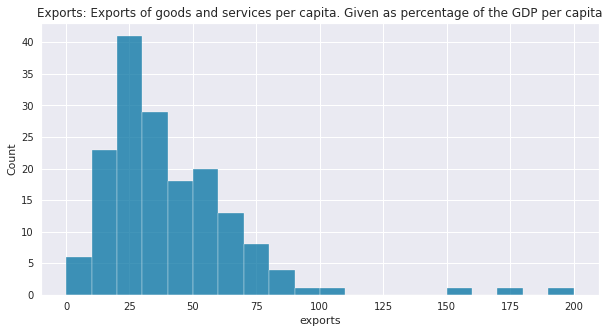

In [13]:
plt.figure(figsize=(10,5))
plt.title("Exports: Exports of goods and services per capita. Given as percentage of the GDP per capita")
ax = sns.histplot(raw_dataset["exports"])

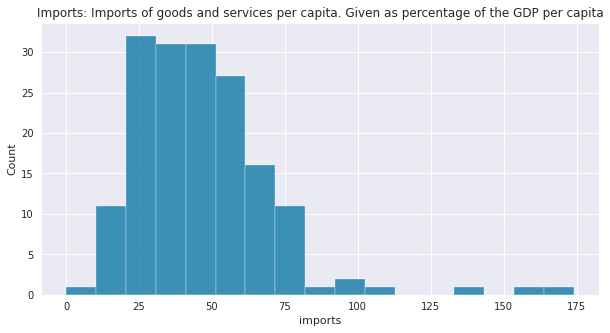

In [14]:
plt.figure(figsize=(10,5))
plt.title("Imports: Imports of goods and services per capita. Given as percentage of the GDP per capita")
ax = sns.histplot(raw_dataset["imports"])

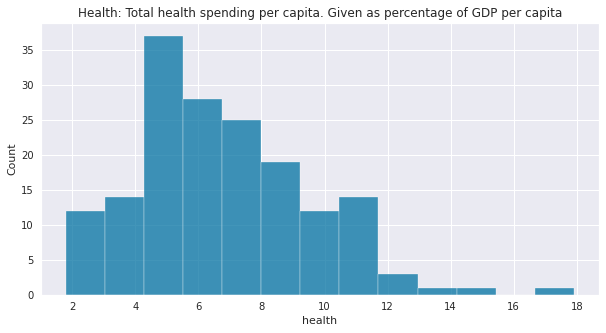

In [15]:
plt.figure(figsize=(10,5))
plt.title("Health: Total health spending per capita. Given as percentage of GDP per capita")
ax = sns.histplot(raw_dataset["health"])

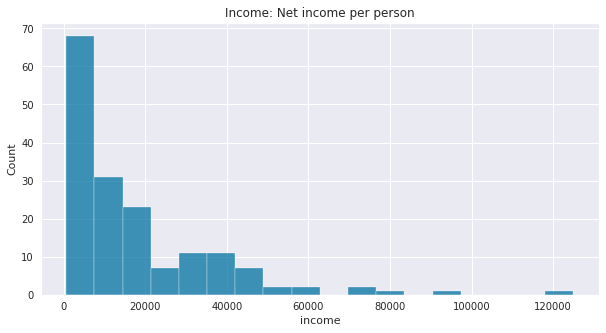

In [16]:
plt.figure(figsize=(10,5))
plt.title("Income: Net income per person")
ax = sns.histplot(raw_dataset["income"])

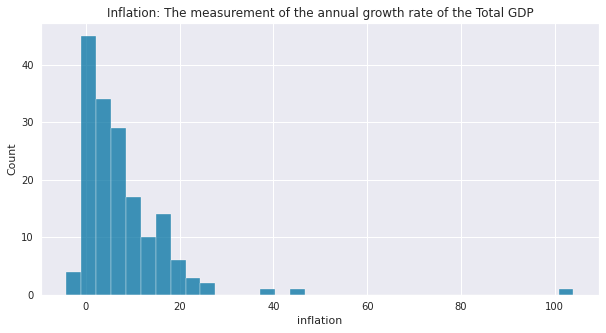

In [17]:
plt.figure(figsize=(10,5))
plt.title("Inflation: The measurement of the annual growth rate of the Total GDP")
ax = sns.histplot(raw_dataset["inflation"])

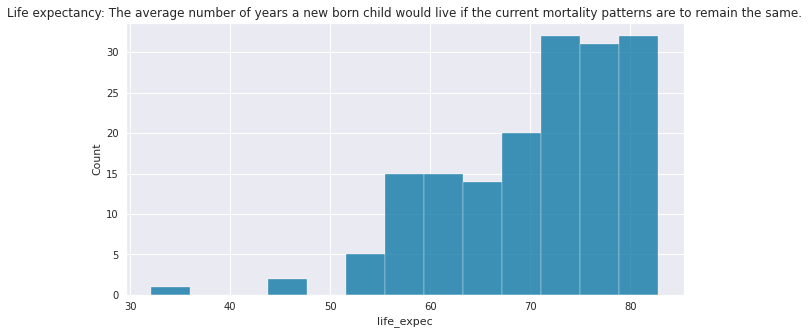

In [18]:
plt.figure(figsize=(10,5))
plt.title("Life expectancy: The average number of years a new born child would live if the current mortality patterns are to remain the same.")
ax = sns.histplot(raw_dataset["life_expec"])

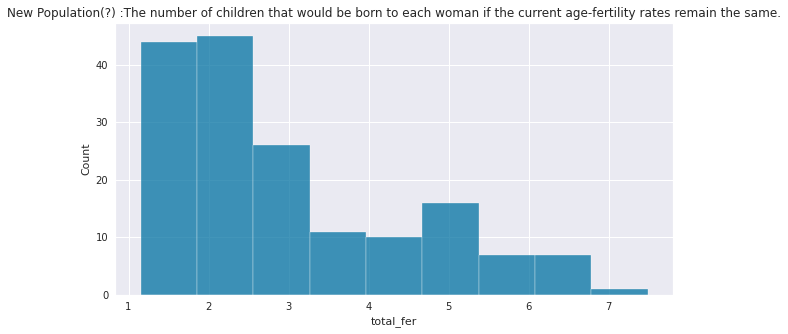

In [19]:
plt.figure(figsize=(10,5))
plt.title("New Population(?) :The number of children that would be born to each woman if the current age-fertility rates remain the same.")
ax = sns.histplot(raw_dataset["total_fer"])

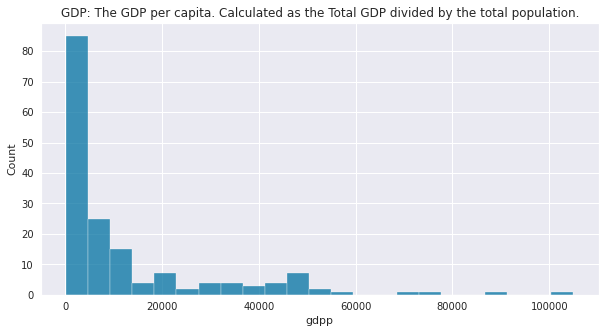

In [20]:
plt.figure(figsize=(10,5))
plt.title("GDP: The GDP per capita. Calculated as the Total GDP divided by the total population.")
ax = sns.histplot(raw_dataset["gdpp"])

**Findings**

Looking at the data distribution we can see that there are some features that do indeed have outliers.

For the purpose of this analysis, outliers will not be removed since they could be considered very informative in that they could point out countries that are in critical condition and in need of help.

For example, Child Mortality is a strong indicator of poverty and necessity, so the outliers in this feature show that there are countries with a higher than normal/critical number in child mortality.
 

## <a id='4'>4. Data evaluation and reduction</a>

### <a id='41'>4.1. Correlation</a>
**Pearson correlation**

The Pearson correlation measures the strength of the linear relationship between two variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.

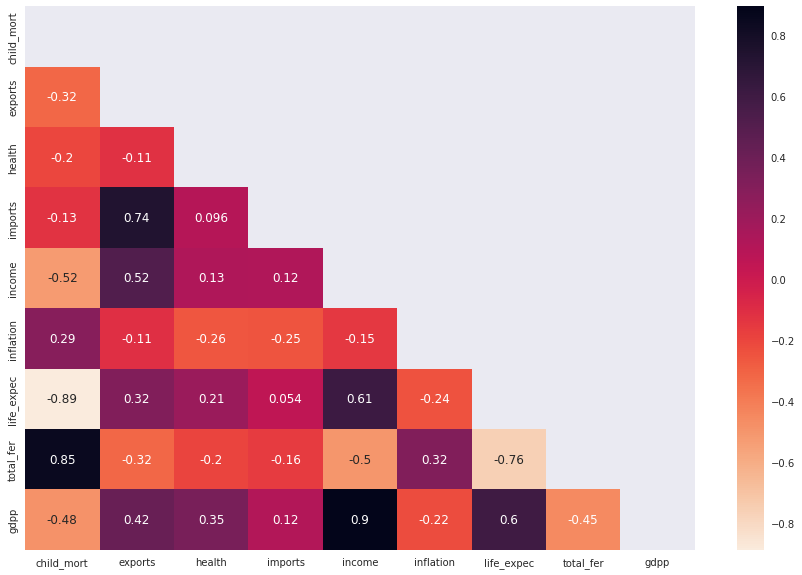

In [21]:
# pearson
plt.figure(figsize=(15,10))

mask = np.triu(raw_dataset.corr())

sns.heatmap(raw_dataset.corr(method='pearson', min_periods=1),annot=True, mask = mask, cmap ="rocket_r");

**Findings** 

After looking at `Pearson correlation` we can see that there are a few features that might be considered for elimination due to high correlation.

- life_expect, due to high correlation with child mortality
- total_fertility, due to high correlation with child mortality
- income, due to high correlation with gdpp


### <a id='42'>4.2. Scaling</a>

Why scale the data? 

* the features have incomparable units (metrics are percentages, dollar values, and whole numbers)
* the range of the features also vary (one for example is 0 to 200, and another 0 to 100,000), so here for example, a change of 50 in one feature is quite significant, whereas in another it is almost unnoticeable
* this level of variance can negatively impact the performance of this model, as this model is based on measuring distances, it can do this by giving more weight to some features 
* by scaling we are removing potential bias that the model can have towards features with higher magnitudes


In [22]:
# Drop column with country information, as only numeric values should be used for unsupervised learning.
dataset = raw_dataset.drop(['country'], axis =1)
dataset.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

#### MinMax Scaler

In [23]:
#save the column names, we'll use these after scaling for creating dataframe.
cols = dataset.columns


scaler = MinMaxScaler()

dataset_w_minmax = scaler.fit_transform(dataset)
dataset_w_minmax

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

#### Standard Scaler

In [24]:
#save the column names, we'll use these after scaling for creating dataframe.
cols = dataset.columns

scaler = StandardScaler()

dataset_w_standard = scaler.fit_transform(dataset)
dataset_w_standard

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

#### Scaled dataframes

In [25]:
# minmax
# create a new dataframe with the column lables and the scaled values 
df_w_minmax = pd.DataFrame(data= dataset_w_minmax , columns = cols )
df_w_minmax

child_mort   exports    health   imports    income  inflation  \
0      0.426485  0.049482  0.358608  0.257765  0.008047   0.126144   
1      0.068160  0.139531  0.294593  0.279037  0.074933   0.080399   
2      0.120253  0.191559  0.146675  0.180149  0.098809   0.187691   
3      0.566699  0.311125  0.064636  0.246266  0.042535   0.245911   
4      0.037488  0.227079  0.262275  0.338255  0.148652   0.052213   
..          ...       ...       ...       ...       ...        ...   
162    0.129503  0.232582  0.213797  0.302609  0.018820   0.063118   
163    0.070594  0.142032  0.192666  0.100809  0.127750   0.463081   
164    0.100779  0.359651  0.312617  0.460715  0.031200   0.150725   
165    0.261441  0.149536  0.209447  0.197397  0.031120   0.257000   
166    0.391918  0.184556  0.253574  0.177275  0.021473   0.168284   

     life_expec  total_fer      gdpp  
0      0.475345   0.736593  0.003073  
1      0.871795   0.078864  0.036833  
2      0.875740   0.274448  0.040365  
3      0.552268   0.790221  0.031488  
4      0.881657   0.154574  0.114242  
..          ...        ...       ...  
162    0.609467   0.370662  0.026143  
163    0.854043   0.208202  0.126650  
164    0.808679   0.126183  0.010299  
165    0.698225   0.555205  0.010299  
166    0.392505   0.670347  0.011731  

[167 rows x 9 columns]

In [26]:
# standard s
# create a new dataframe with the column lables and the scaled values 
df_w_standard = pd.DataFrame(data= dataset_w_standard , columns = cols)
df_w_standard

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

#### Comparing scaling methods

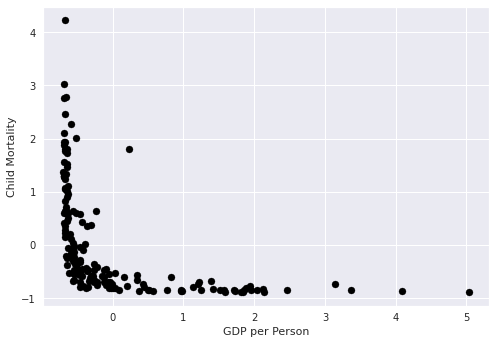

In [27]:
plt.scatter(df_w_standard['gdpp'], df_w_standard['child_mort'],color = 'black')
plt.xlabel('GDP per Person')
plt.ylabel('Child Mortality');

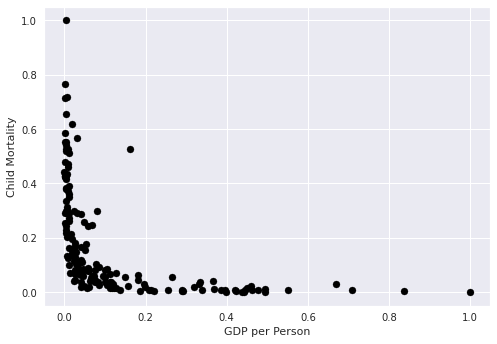

In [28]:
plt.scatter(df_w_minmax['gdpp'], df_w_minmax['child_mort'],color = 'black')
plt.xlabel('GDP per Person')
plt.ylabel('Child Mortality');

### <a id='423'>4.3. PCA: Principal Component Analysis</a>

#### PCA with data scaled with StandardScaler

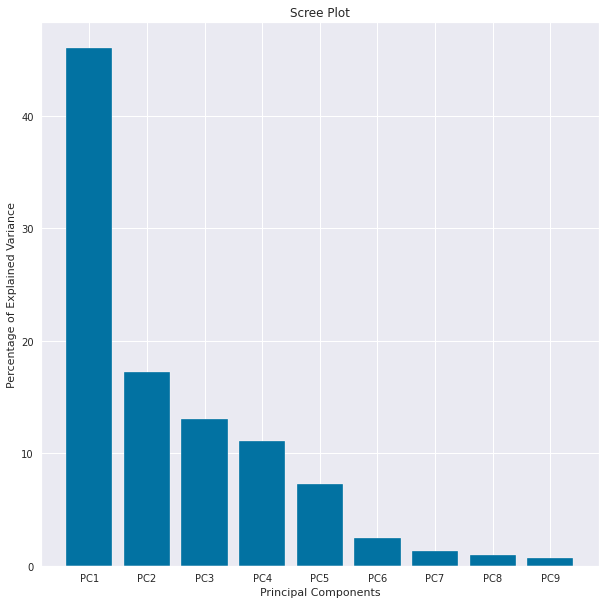

Text(0, 0.5, 'P_C2 - 17.2%')

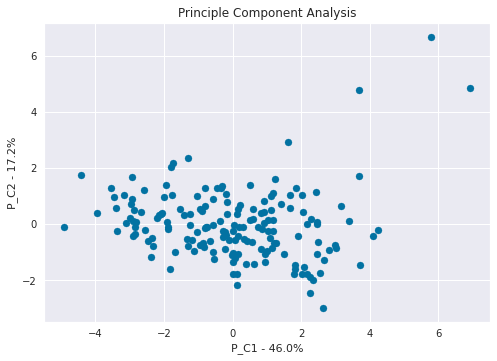

In [29]:
# import PCA 
from sklearn.decomposition import PCA

# fit and transform
pca = PCA()
pca.fit(df_w_standard)
pca_data_standard = pca.transform(df_w_standard)

# percentage variation 
per_variance = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['Principal_Component_' + str(x) for x in range (1, len(per_variance)+1)]

# plot the percentage of explained variance by principal component
plt.figure(figsize=(10,10))
plt.bar(x=range(1,len(per_variance)+1), height=per_variance, tick_label = ["PC1", "PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9"])

plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained Variance')
plt.title('Scree Plot')
plt.show()

# plot pca
pca_df_standard = pd.DataFrame(pca_data_standard, columns = labels)
plt.scatter(pca_df_standard["Principal_Component_1"], pca_df_standard["Principal_Component_2"])
plt.title('Principle Component Analysis')
plt.xlabel('P_C1 - {0}%'.format(per_variance[0]))
plt.ylabel('P_C2 - {0}%'.format(per_variance[1]))

#### PCA with data scaled with MinMaxScaler

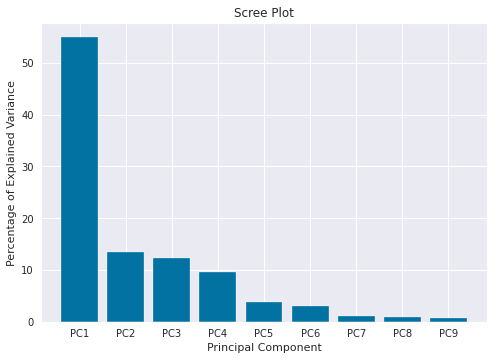

Text(0, 0.5, 'PC2 - 13.4%')

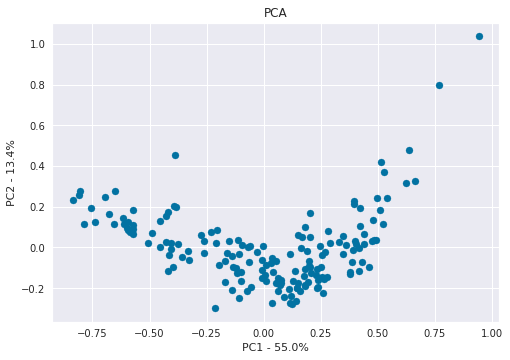

In [30]:
# import PCA 
from sklearn.decomposition import PCA

# fit and transform
pca = PCA()
pca.fit(df_w_minmax)
pca_data_minmax = pca.transform(df_w_minmax)

# percentage variation 
per_variance = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['Principal_Component_' + str(x) for x in range (1, len(per_variance)+1)]

# plot the percentage of explained variance by principal component
plt.bar(x=range(1,len(per_variance)+1), height=per_variance, tick_label = ["PC1", "PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9"])
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# plot pca

pca_df_minmax = pd.DataFrame(pca_data_minmax, columns = labels)
plt.scatter(pca_df_minmax["Principal_Component_1"], pca_df_minmax["Principal_Component_2"])
plt.title('PCA')
plt.xlabel('PC1 - {0}%'.format(per_variance[0]))
plt.ylabel('PC2 - {0}%'.format(per_variance[1]))

In [31]:
# dataframe with Principal components 1, 2, 3, and 4. scaled by standard scaler
dataset_w_pca = pca_df_standard.drop(['Principal_Component_5', 'Principal_Component_6','Principal_Component_7', 'Principal_Component_8', 'Principal_Component_9'], axis = 1)
dataset_w_pca

Principal_Component_1  Principal_Component_2  Principal_Component_3  \
0                -2.913025               0.095621              -0.718118   
1                 0.429911              -0.588156              -0.333486   
2                -0.285225              -0.455174               1.221505   
3                -2.932423               1.695555               1.525044   
4                 1.033576               0.136659              -0.225721   
..                     ...                    ...                    ...   
162              -0.820631               0.639570              -0.389923   
163              -0.551036              -1.233886               3.101350   
164               0.498524               1.390744              -0.238526   
165              -1.887451              -0.109453               1.109752   
166              -2.864064               0.485998               0.223167   

     Principal_Component_4  
0                 1.005255  
1                -1.161059  
2                -0.868115  
3                 0.839625  
4                -0.847063  
..                     ...  
162              -0.706595  
163              -0.115311  
164              -1.074098  
165               0.056257  
166               0.816364  

[167 rows x 4 columns]

**Findings**

After doing PCA with both standardised and normalised versions of the original dataset, we can see that there are 4 principal components that can explain about 90% of the distribution of the original data.


## <a id='5'>5. Model: K-Means Clustering</a>

### <a id='51'>5.1. Building Model </a>

In [32]:
km = KMeans (
    n_clusters = 3, # number of clusters/centroids to create
    init = 'random', # ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids
    n_init = 10, # this is the default value. This is the number of times the k-means algorithm will be run with different centroid seeds
    max_iter = 300, # this is the default value. This is the maximum number of iterations of the k-means algorithm for a single run.
    tol = 1e-4,
    random_state = 0 #Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.
)

#### Run model with different versions of the dataset

In [33]:
# normalised dataset
# method to compute the clusters and assign the labels
y_predicted_minmax = km.fit_predict(df_w_minmax) # fit_predict --> Compute cluster centers and predict cluster index for each sample.
y_predicted_minmax

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [34]:
# standardised dataset
# method to compute the clusters and assign the labels
y_predicted_standard = km.fit_predict(df_w_standard) # fit_predict --> Compute cluster centers and predict cluster index for each sample.
y_predicted_standard

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [35]:
# dataset_w_pca is the original dataset with standard scaling and 4 principal components found with PCA
# method to compute the clusters and assign the labels
y_predicted_pca = km.fit_predict(dataset_w_pca) # fit_predict --> Compute cluster centers and predict cluster index for each sample.
y_predicted_pca

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [36]:
# add the cluster column to the dataframe 
df_w_minmax['cluster'] = y_predicted_minmax
df_w_minmax.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.358608  0.257765  0.008047   0.126144    0.475345   
1    0.068160  0.139531  0.294593  0.279037  0.074933   0.080399    0.871795   
2    0.120253  0.191559  0.146675  0.180149  0.098809   0.187691    0.875740   
3    0.566699  0.311125  0.064636  0.246266  0.042535   0.245911    0.552268   
4    0.037488  0.227079  0.262275  0.338255  0.148652   0.052213    0.881657   

   total_fer      gdpp  cluster  
0   0.736593  0.003073        1  
1   0.078864  0.036833        0  
2   0.274448  0.040365        0  
3   0.790221  0.031488        1  
4   0.154574  0.114242        0

In [37]:
# add the cluster column to the dataframe 
df_w_standard['cluster'] = y_predicted_standard
df_w_standard.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  cluster  
0   1.902882 -0.679180        1  
1  -0.859973 -0.485623        0  
2  -0.038404 -0.465376        0  
3   2.128151 -0.516268        1  
4  -0.541946 -0.041817        0

In [38]:
# add the cluster column to the dataframe (dataset does not include feature 'country')
dataset['cluster'] = y_predicted_pca
dataset.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  cluster  
0       5.82    553        1  
1       1.65   4090        0  
2       2.89   4460        0  
3       6.16   3530        1  
4       2.13  12200        0

### <a id='52'>5.2. Optimal number of clusters: Elbow Method</a>

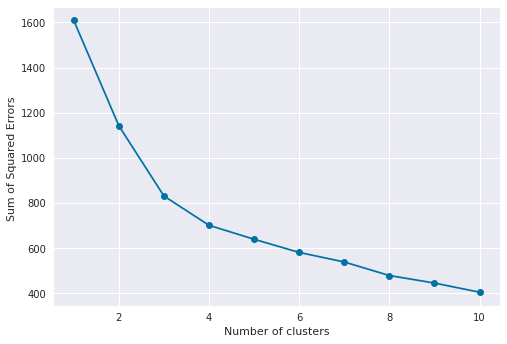

In [39]:
# calculate Sum of Squared Errors (SSE), also called distorsions,  for a range of number of cluster - with df scaled with StandardScaler
errors = []
for i in range(1, 11):
    model = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    model.fit(df_w_standard)
    errors.append(model.inertia_)

# plot
plt.plot(range(1, 11), errors, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors ')
plt.show()

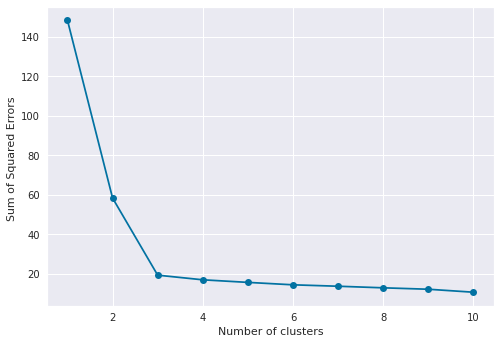

In [40]:
# calculate Sum of Squared Errors (SSE), also called distorsions, for a range of number of cluster - with df scaled with MinMax

errors = []
for i in range(1, 11):
    model = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    model.fit(df_w_minmax)
    errors.append(model.inertia_)

# plot
plt.plot(range(1, 11), errors, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors ')
plt.show()

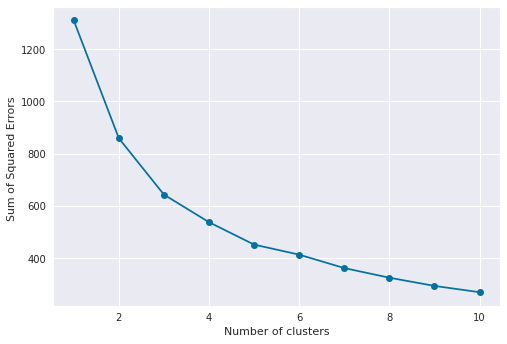

In [41]:
# calculate Sum of Squared Errors (SSE), also called distorsions, for a range of number of cluster - with df scaled with StandardScaler + PCA
errors = []
for i in range(1, 11):
    model = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    model.fit(dataset_w_pca)
    errors.append(model.inertia_)

# plot
plt.plot(range(1, 11), errors, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors ')
plt.show()

**Findings**

After running the K-Means model with a normalised dataset, a standardised dataset, and PCA with 4 components (with standardised scaling) we can see that the optimal number of clusters is still 3 with different levels of inertia.

## <a id='6'>6. Cluster analysis</a>

### <a id='61'>6.1. Cluster plotting and visualisation</a>

#### Visualise clusters by feature, scaled data with StandardScaler (standardisation)

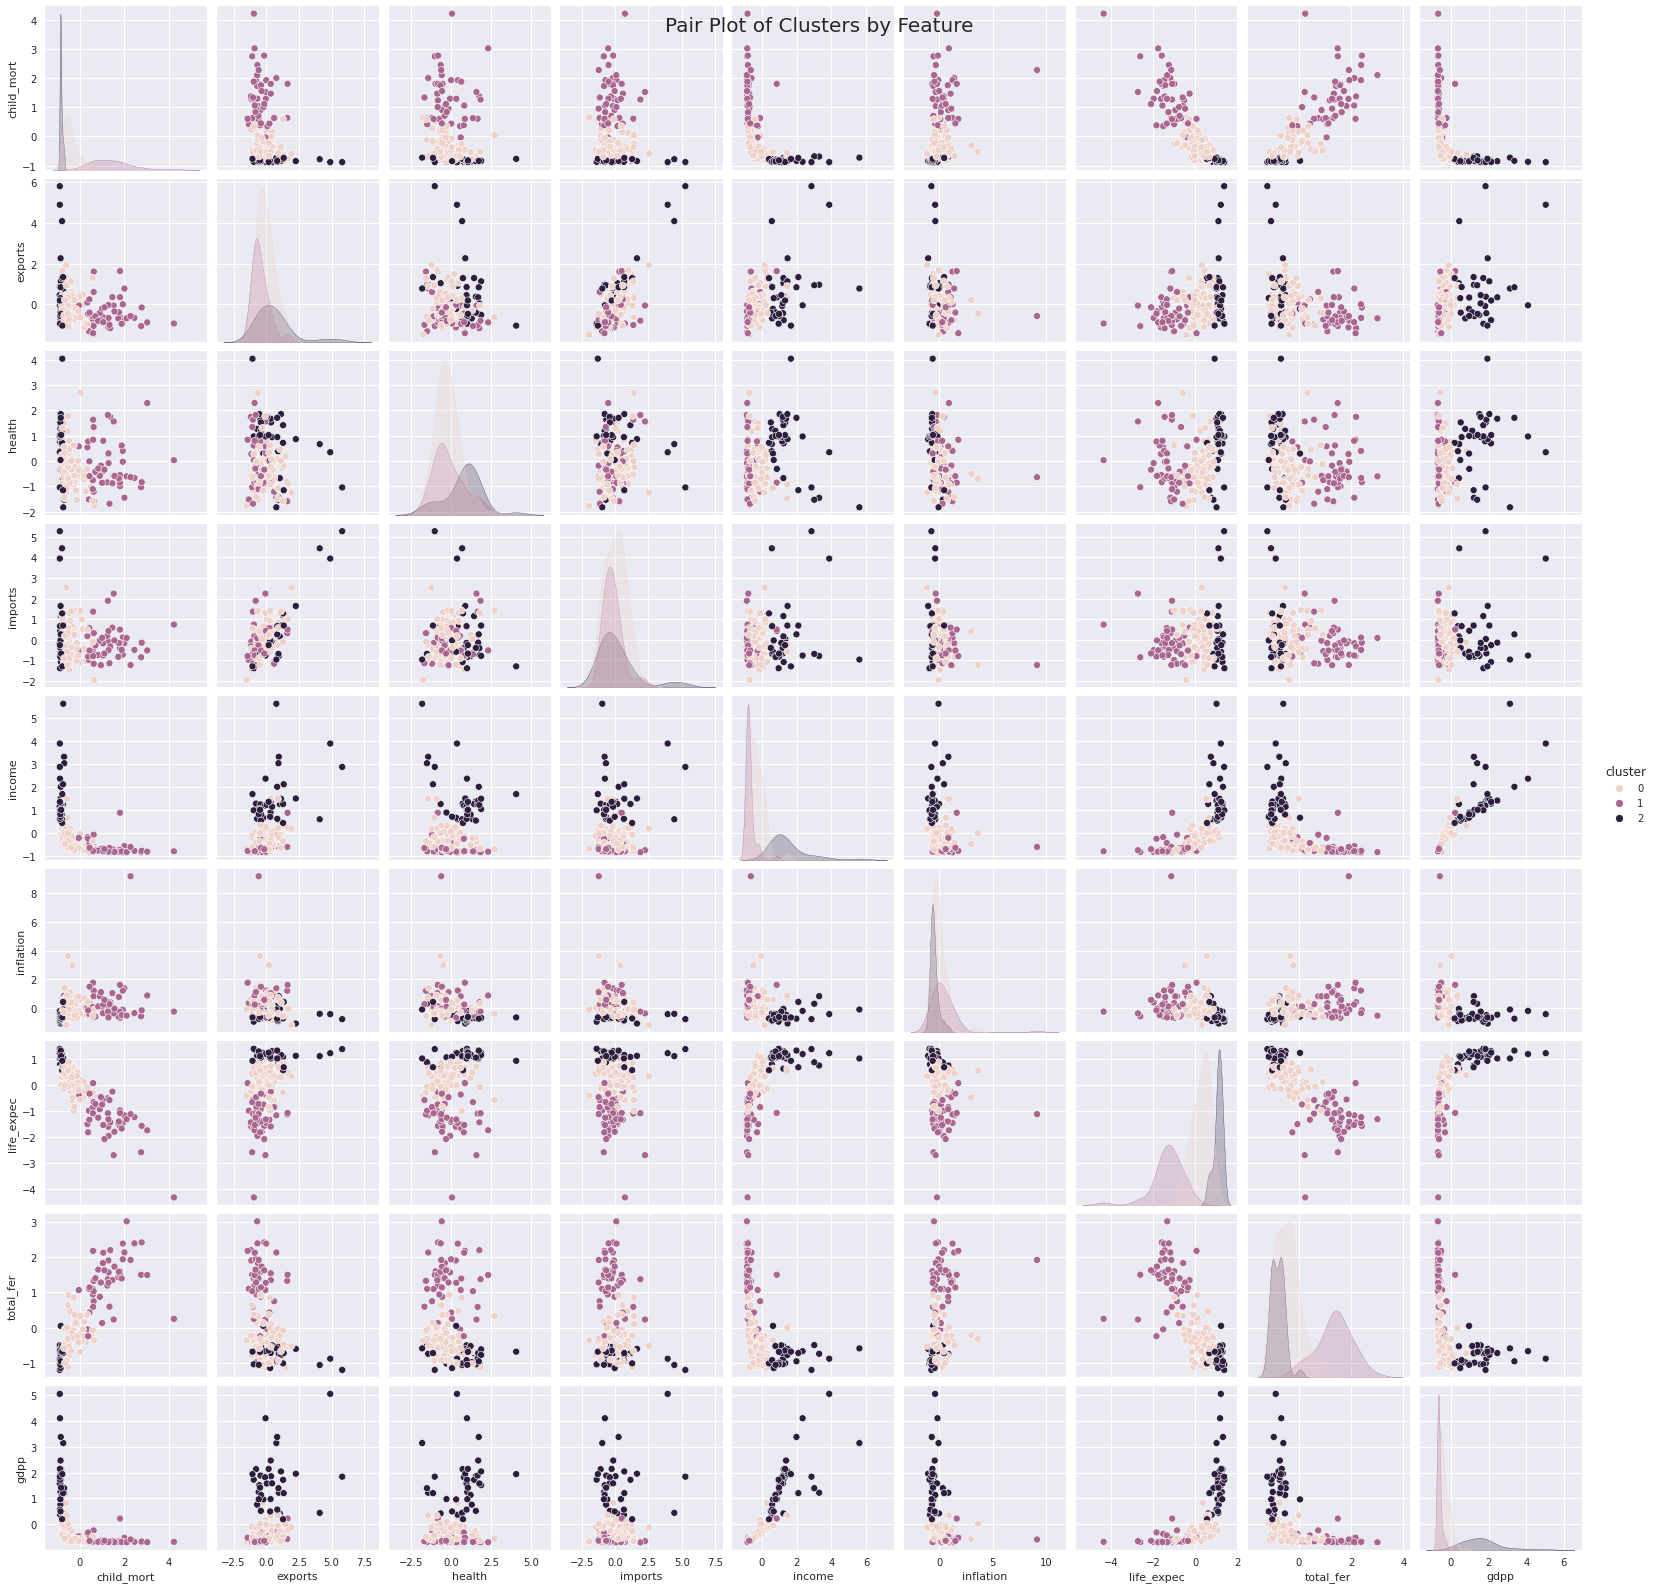

In [42]:
sns.pairplot(df_w_standard, hue="cluster")

# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 20);

#### Visualise clusters by feature, scaled data with MinMaxScaler (normalisation)

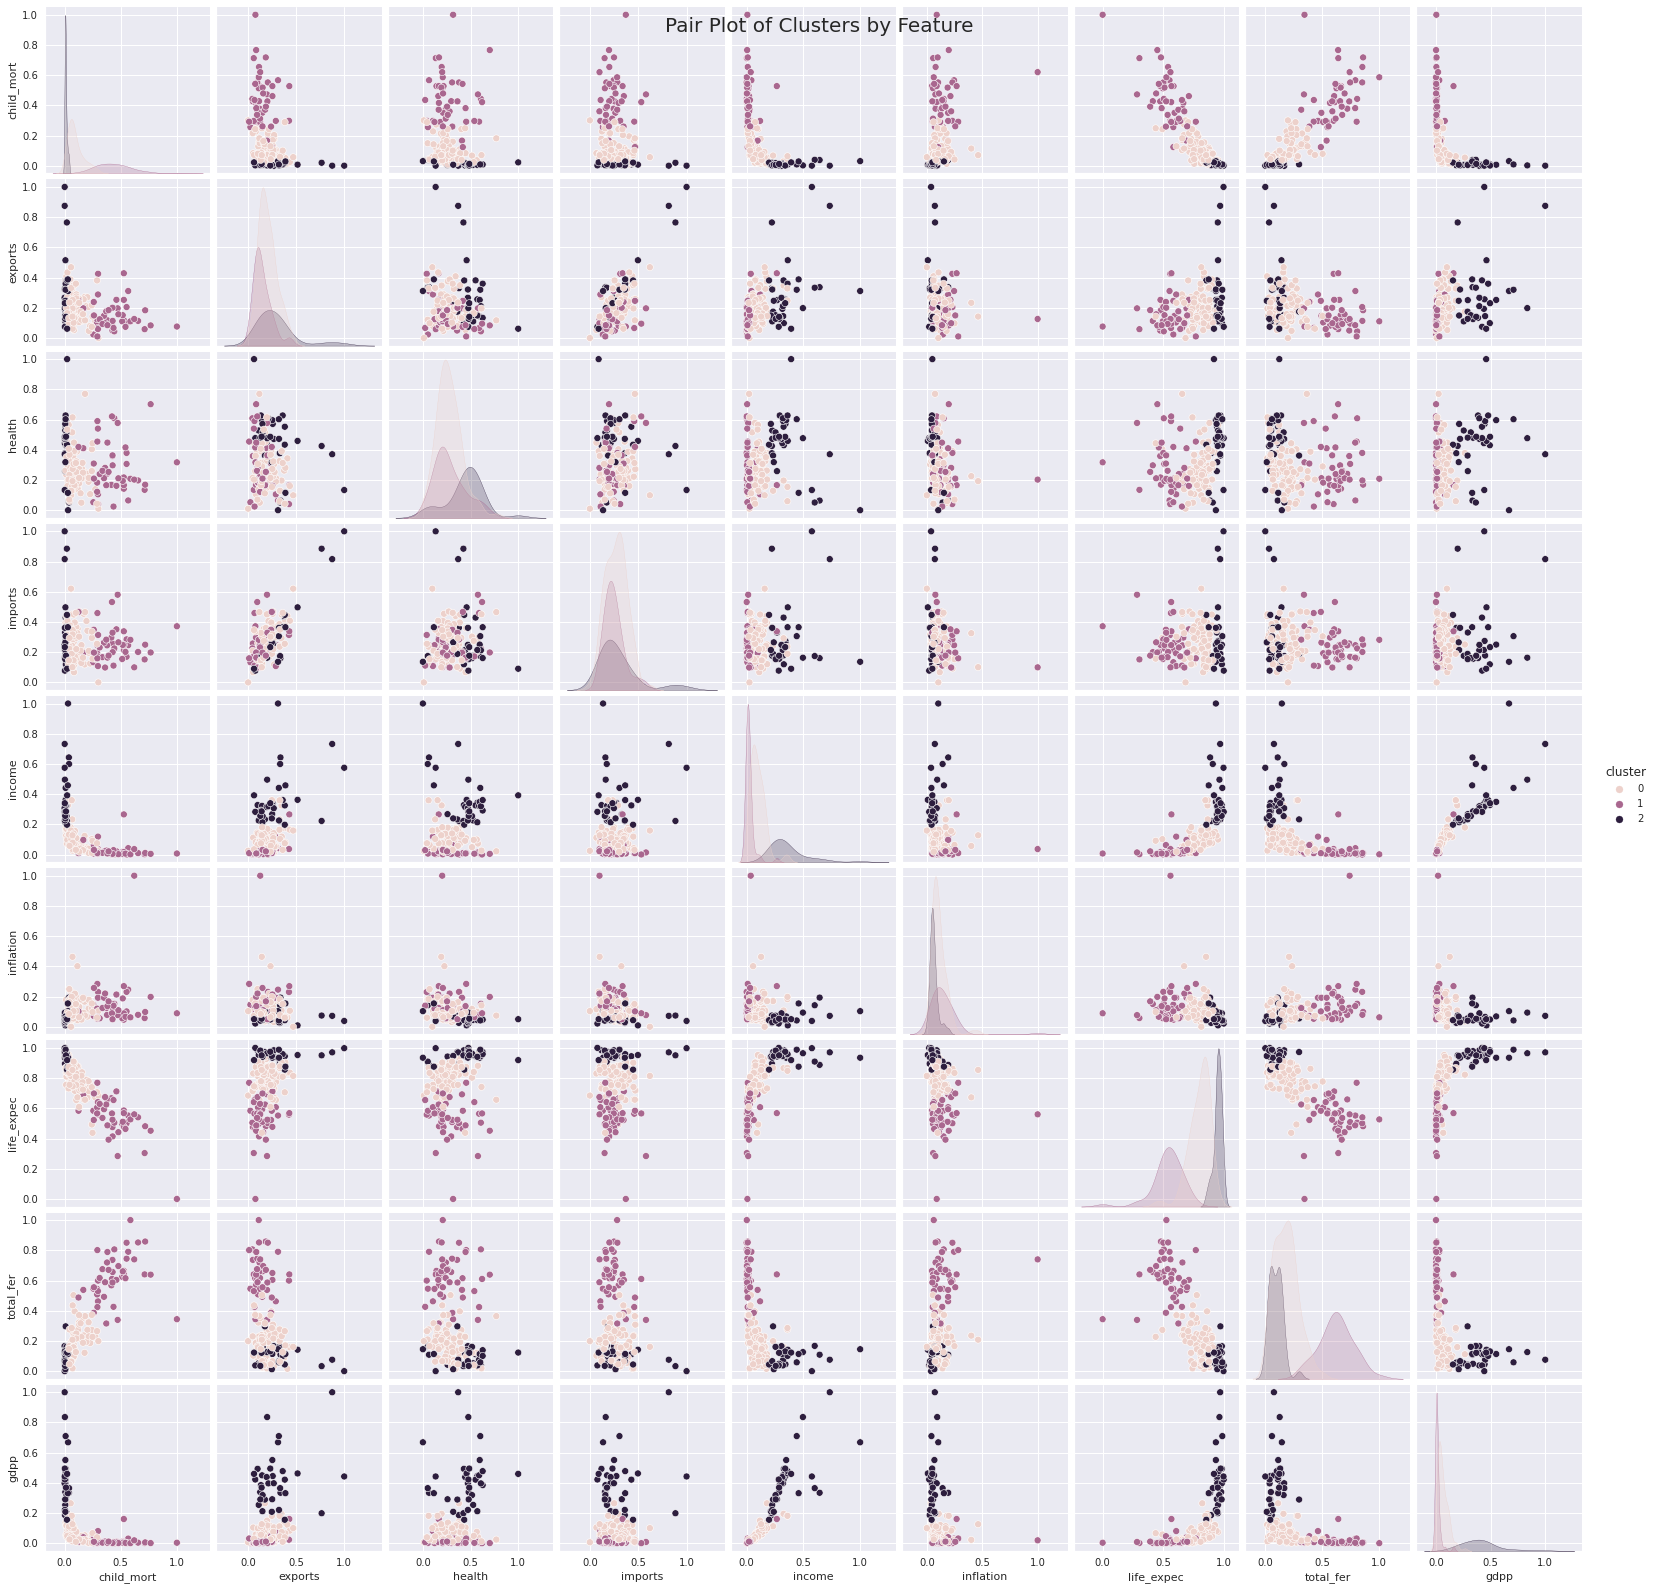

In [43]:
# plot
sns.pairplot(df_w_minmax, hue="cluster")

# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 20);

#### Visualise clusters by feature, scaled data with StandardScaler and with reduction of features with PCA

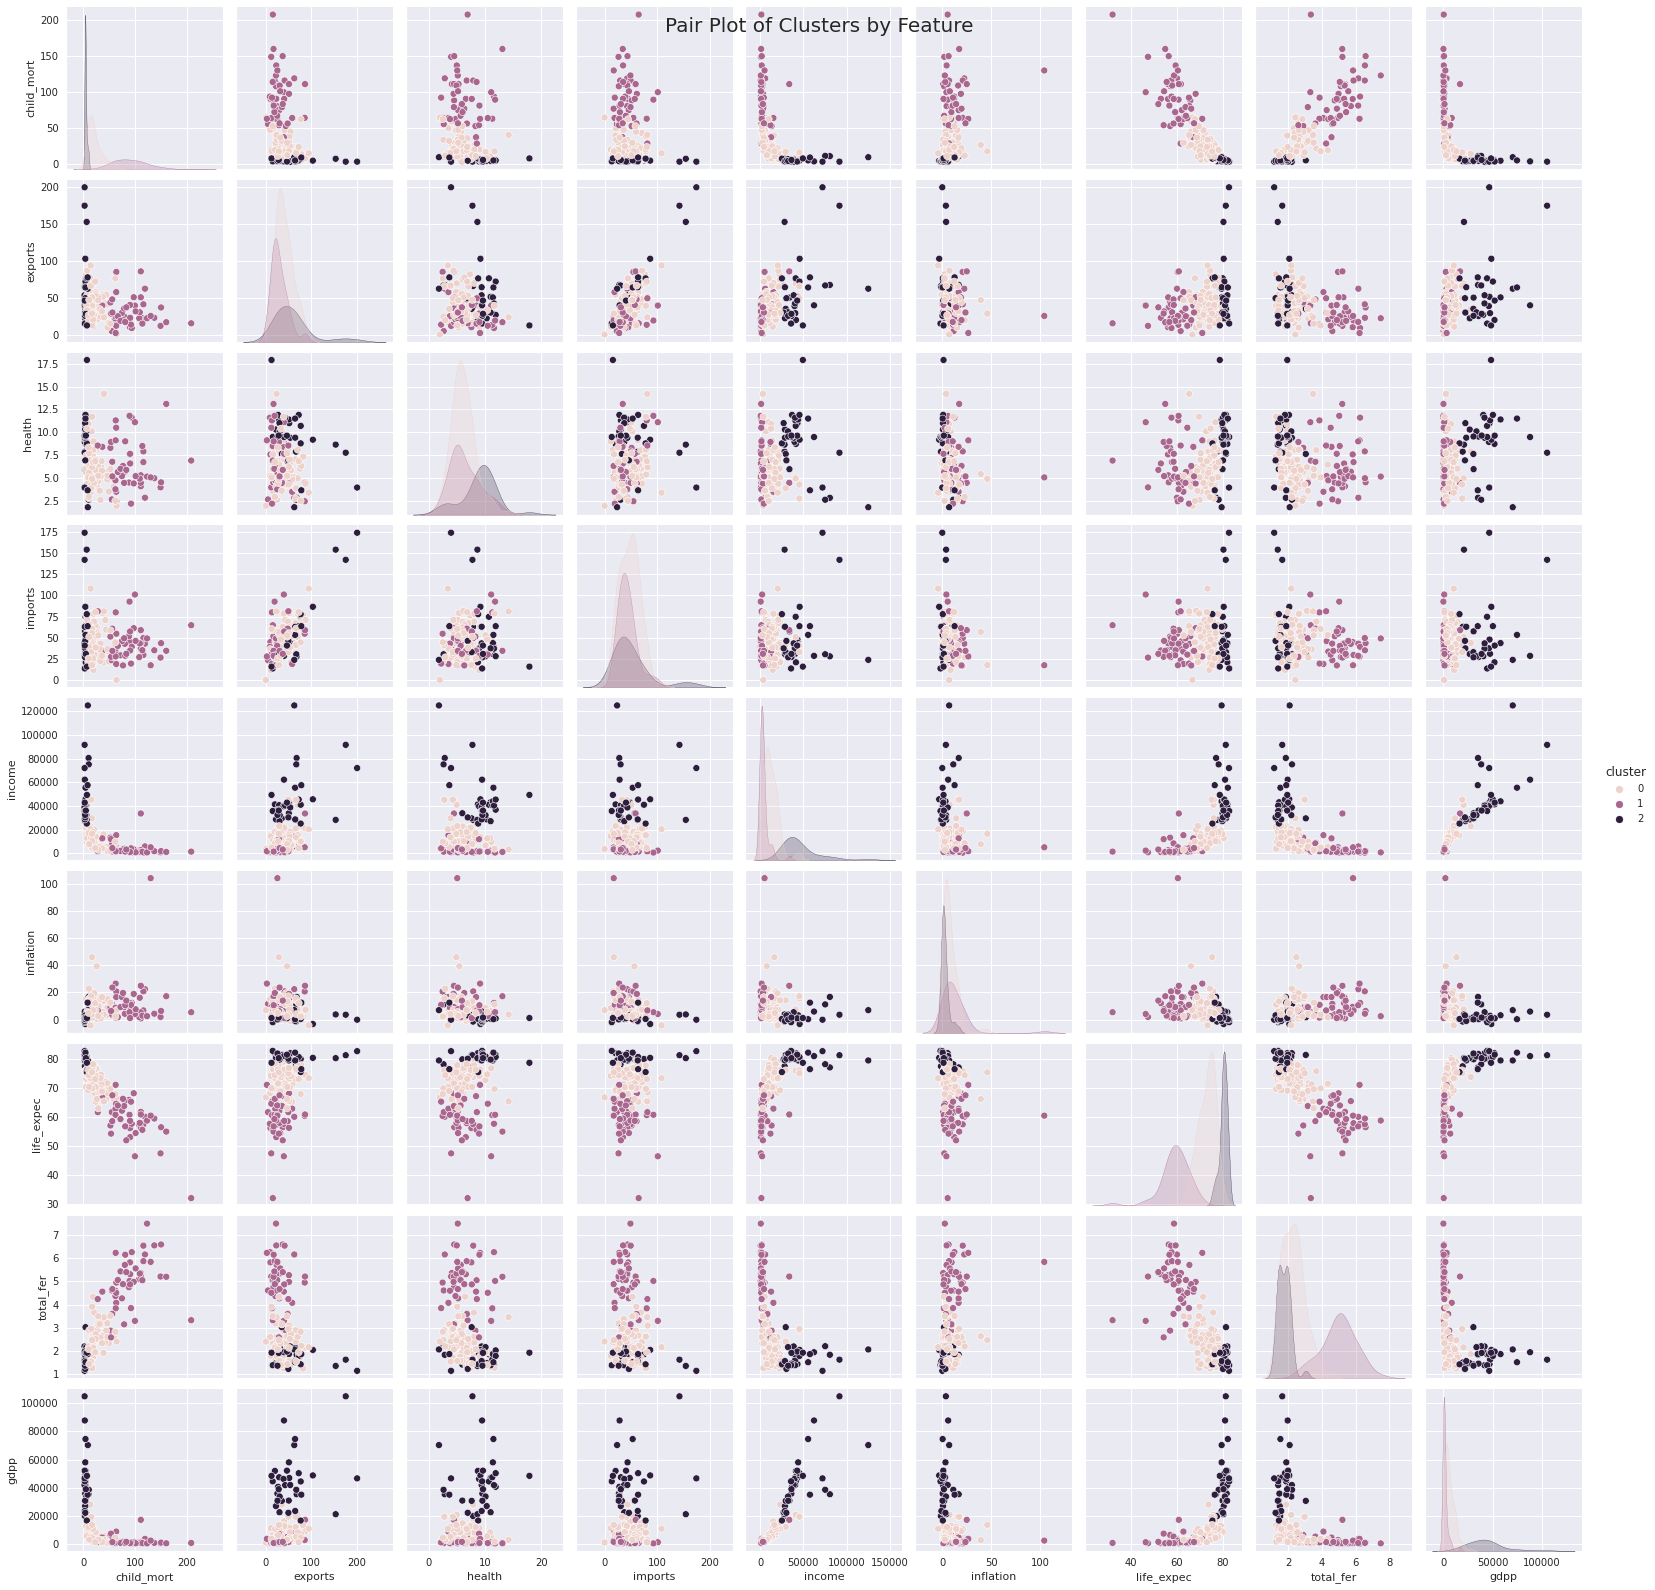

In [44]:

# plot
sns.pairplot(dataset, hue="cluster")

# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 20);

**Findings**

After running the model with 2 types of scaling and using PCA, we can see there tends to be overlapping between clusters.
Cluster 2 is more spread out and clusters 0 and 1 tend to overlap.

### <a id='62'>6.2. Cluster characteristics</a>

In [45]:
# add cluster column to original dataset with countries and non-scaled values
raw_dataset['cluster'] = y_predicted_standard.tolist()
raw_dataset

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  cluster  
0         9.44        56.2       5.82    553        1  
1         4.49        76.3       1.65   4090        0  
2        16.10        76.5       2.89   4460        0  
3        22.40        60.1       6.16   3530        1  
4         1.44        76.8       2.13  12200        0  
..         ...         ...        ...    ...      ...  
162       2.62        63.0       3.50   2970        0  
163      45.90        75.4       2.47  13500        0  
164      12.10        73.1       1.95   1310        0  
165      23.60        67.5       4.67   1310        1  
166      14.00        52.0       5.40   1460        1  

[167 rows x 11 columns]

#### Visualise clusters by feature, original data with no scaling

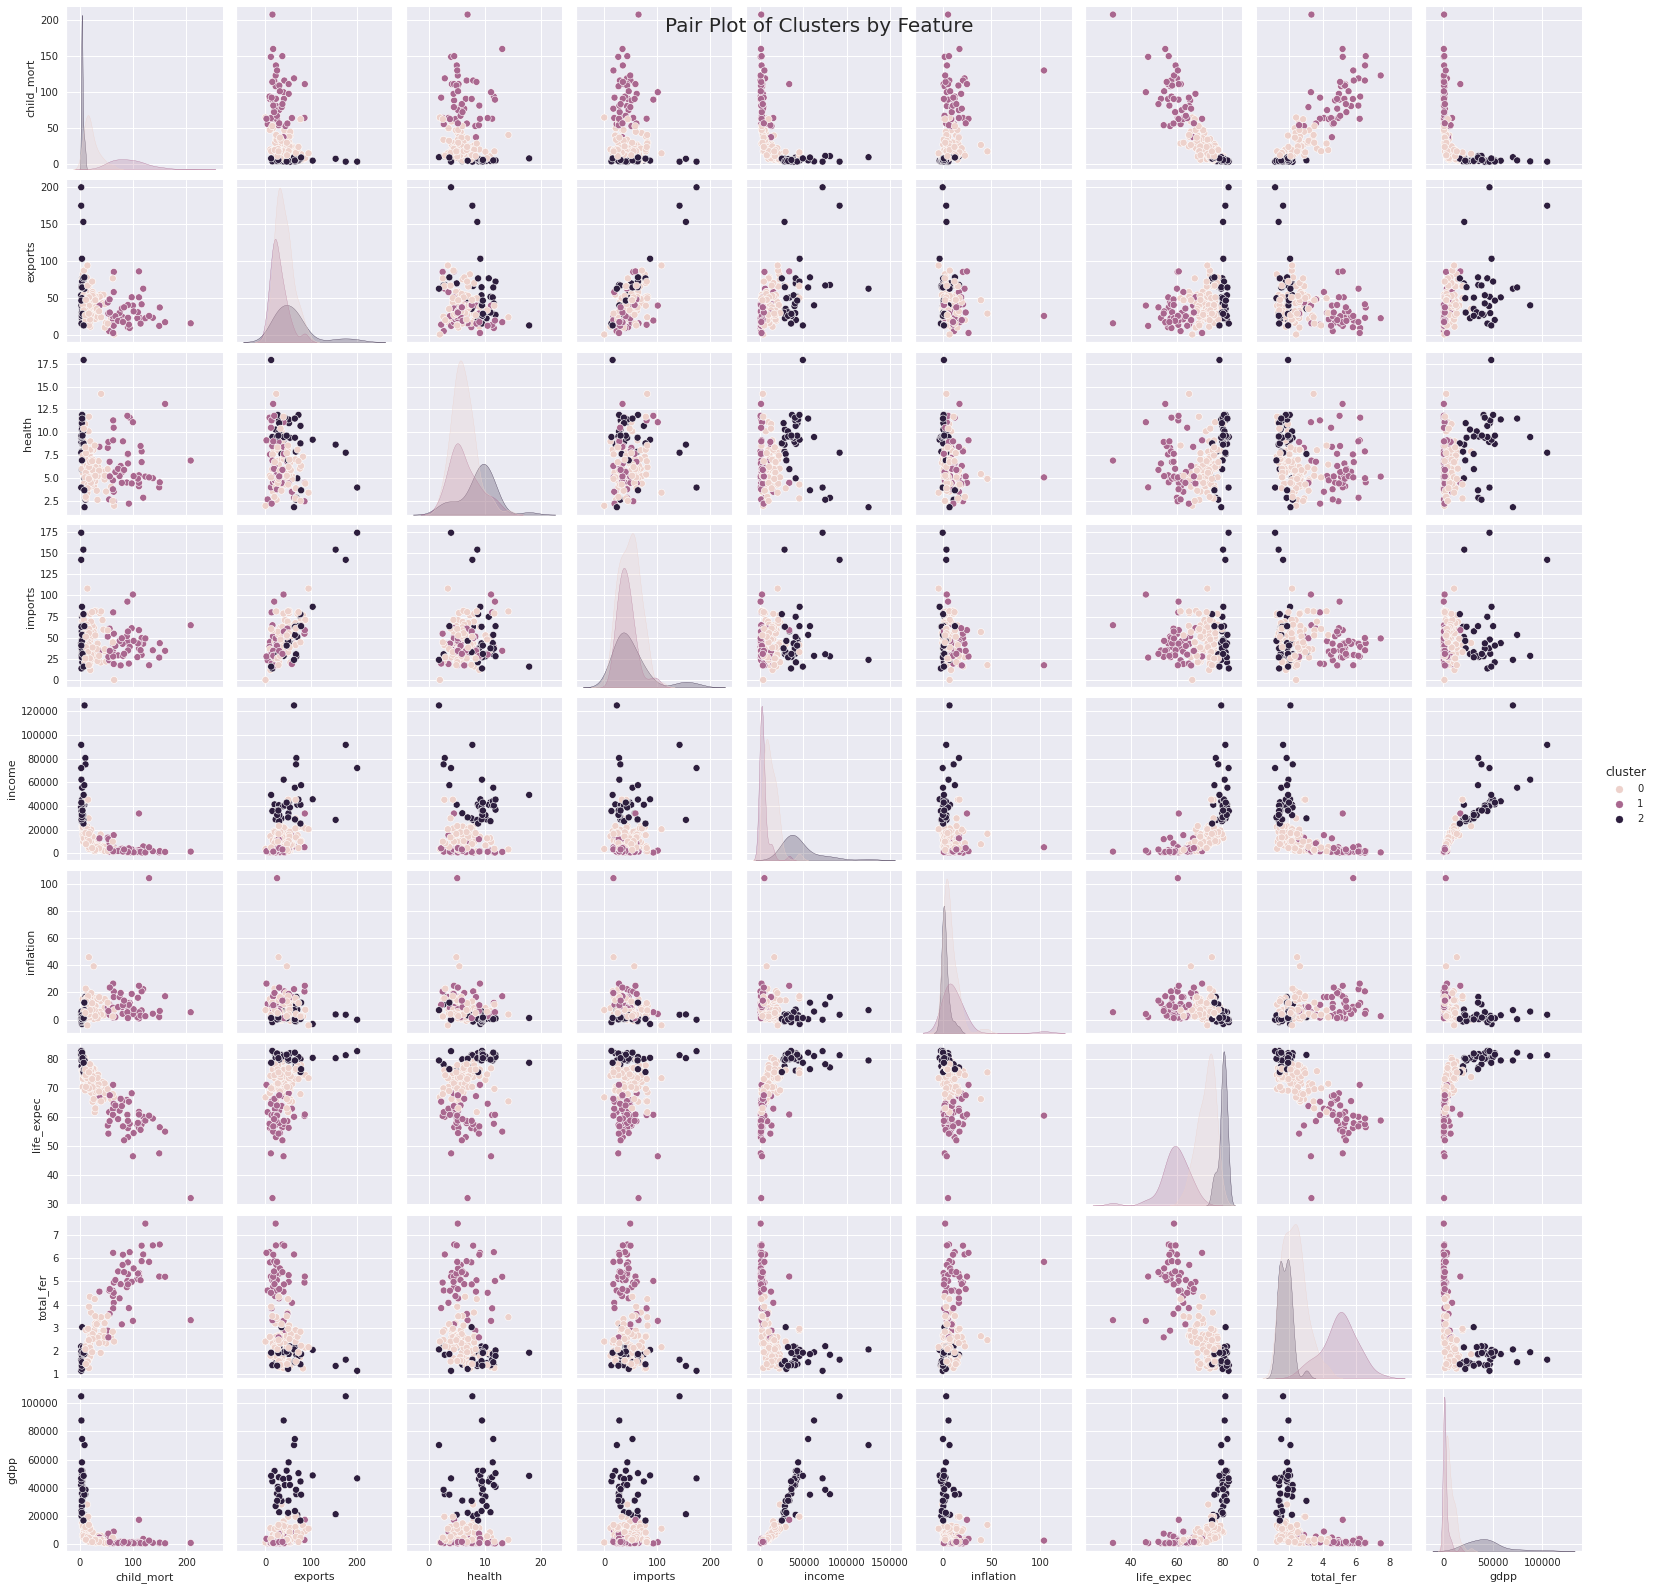

In [46]:
# load example dataset from seaborn 
sns.get_dataset_names()

# plot
sns.load_dataset('penguins')
sns.pairplot(raw_dataset, hue="cluster")

# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 20);

### <a id='63'>6.3. Cluster descriptions</a>

In [47]:
raw_dataset.head(3)

country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   
2      Algeria        27.3     38.4    4.17     31.4   12900      16.10   

   life_expec  total_fer  gdpp  cluster  
0        56.2       5.82   553        1  
1        76.3       1.65  4090        0  
2        76.5       2.89  4460        0

In [48]:
# table of clusters showing mean values per cluster and per feature
clusters_table = pd.pivot_table(raw_dataset, index=['cluster'])
clusters_table

child_mort    exports          gdpp    health    imports  \
cluster                                                             
0         21.927381  40.243917   6486.452381  6.200952  47.473404   
1         92.961702  29.151277   1922.382979  6.388511  42.323404   
2          5.000000  58.738889  42494.444444  8.807778  51.491667   

               income  inflation  life_expec  total_fer  
cluster                                                  
0        12305.595238   7.600905   72.814286   2.307500  
1         3942.404255  12.019681   59.187234   5.008085  
2        45672.222222   2.671250   80.127778   1.752778

In [49]:
# cluster 0 
cluster_0 = raw_dataset.loc[raw_dataset['cluster'] == 0]

# list of countries in this cluster
cluster_0.country.unique()

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia',
       'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia',
       'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic',
       'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR',
       'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.',
       'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal',
       'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia',
       'Seychelles', 'Solomon Islands', 'Sri Lanka',
       'St. Vincent and the Grenadines'

**Cluster 0: This cluster is characterised by showing average values for all features when comparing with other clusters**

- child mortality -->      Average
- exports         -->      Average
- gdpp            -->      Average
- health          -->      Same as cluster 1
- imports         -->      Average
- income          -->      Average
- inflation       -->      Average
- life_expectancy -->      +70 years
- total_fertility -->      Average, 2 children per woman (number of children that would be born to each woman if the current age-fertility rates remain the same)

In [50]:
# cluster 1 
cluster_1 = raw_dataset.loc[raw_dataset['cluster'] == 1]

# list of countries in this cluster
cluster_1.country.unique()

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'], dtype=object)

**Cluster 1: This cluster is characterised by having the most negative values: high child mortality, lowest economic development, low gdpp, exports and imports, lowest life expectancy**


- child mortality -->      Highest
- exports         -->      Lowest
- gdpp            -->      Lowest
- health          -->      Same as cluster 0
- imports         -->      Lowest
- income          -->      significantly lower than other clusters
- inflation       -->      Highest
- life_expectancy -->      +50 years
- total_fertility -->      Average, 5 children per woman

In [51]:
# cluster 2 
cluster_2 = raw_dataset.loc[raw_dataset['cluster'] == 2]

# list of countries in this cluster
cluster_2.country.unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada',
       'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands',
       'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore',
       'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

**Cluster 2: This cluster is characterised by showing really strong or positive values such as good economic development, high life expectancy, low child mortality**


- child mortality -->      Lowest
- exports         -->      highest
- gdpp            -->      highest by a lot
- health          -->      higher than both the other clusters
- imports         -->      highest
- income          -->      significantly higher than other clusters
- inflation       -->      Lowest
- life_expectancy -->      +80 years
- total_fertility -->      lowest age-fertility rate, 1 child per woman.

### <a id='64'>6.4. Clusters and their location in the world</a>

In [52]:
# load example data from geodataframe 
world_countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_countries.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [53]:
# look at country names from gpd list
print(sorted(world_countries['name'].unique()))
# look at country names for analysis list
print("\n\n",sorted(raw_dataset['country'].unique()))

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.', 'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', '

In [54]:
# compare 2 lists to idenitfy country names that need to be adjusted
world_countries_list = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.', 'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Macedonia', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'N. Cyprus', 'Namibia', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Korea', 'Norway', 'Oman', 'Pakistan', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'S. Sudan', 'Saudi Arabia', 'Senegal', 'Serbia', 'Sierra Leone', 'Slovakia', 'Slovenia', 'Solomon Is.', 'Somalia', 'Somaliland', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'W. Sahara', 'Yemen', 'Zambia', 'Zimbabwe', 'eSwatini']
dataset_countries_list = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Samoa', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovenia', 'Solomon Islands', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia']

list_difference = []
for item in world_countries_list:
  if item not in dataset_countries_list:
    list_difference.append(item)

print(list_difference)

['Bosnia and Herz.', 'Central African Rep.', 'Congo', 'Cuba', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Djibouti', 'Dominican Rep.', 'Eq. Guinea', 'Ethiopia', 'Falkland Is.', 'Fr. S. Antarctic Lands', 'Greenland', 'Honduras', 'Kosovo', 'Kyrgyzstan', 'Laos', 'Macedonia', 'Mexico', 'Myanmar', 'N. Cyprus', 'New Caledonia', 'Nicaragua', 'North Korea', 'Palestine', 'Papua New Guinea', 'Puerto Rico', 'S. Sudan', 'Slovakia', 'Solomon Is.', 'Somalia', 'Somaliland', 'Syria', 'Taiwan', 'Trinidad and Tobago', 'United States of America', 'W. Sahara', 'Zimbabwe', 'eSwatini']


In [55]:
# update names on world gdp dataset to match with df
world_countries['name'] = world_countries['name'].replace(
    ['Bosnia and Herz.', 'Central African Rep.', 'Congo', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Dominican Rep.', 'Eq. Guinea', 'Macedonia', 'Myanmar', 'N. Cyprus', 'S. Sudan', 'Slovakia', 'Solomon Is.', 'United States of America'],
    ['Bosnia and Herzegovina','Central African Republic','Congo, Rep.',"Cote d'Ivoire",'Congo, Dem. Rep.','Dominican Republic','Equatorial Guinea','Macedonia, FYR','Myanmar','Cyprus','Sudan','Slovak Republic','Solomon Islands','United States'])

# check output
world_countries.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada', 'United States',
       'Kazakhstan', 'Uzbekistan', 'Papua New Guinea', 'Indonesia',
       'Argentina', 'Chile', 'Congo, Dem. Rep.', 'Somalia', 'Kenya',
       'Sudan', 'Chad', 'Haiti', 'Dominican Republic', 'Russia',
       'Bahamas', 'Falkland Is.', 'Norway', 'Greenland',
       'Fr. S. Antarctic Lands', 'Timor-Leste', 'South Africa', 'Lesotho',
       'Mexico', 'Uruguay', 'Brazil', 'Bolivia', 'Peru', 'Colombia',
       'Panama', 'Costa Rica', 'Nicaragua', 'Honduras', 'El Salvador',
       'Guatemala', 'Belize', 'Venezuela', 'Guyana', 'Suriname', 'France',
       'Ecuador', 'Puerto Rico', 'Jamaica', 'Cuba', 'Zimbabwe',
       'Botswana', 'Namibia', 'Senegal', 'Mali', 'Mauritania', 'Benin',
       'Niger', 'Nigeria', 'Cameroon', 'Togo', 'Ghana', "Cote d'Ivoire",
       'Guinea', 'Guinea-Bissau', 'Liberia', 'Sierra Leone',
       'Burkina Faso', 'Central African Republic', 'Congo, Rep.', 'Gabon',
       'Equatorial Guinea', 'Zambia', '

/opt/conda/lib/python3.7/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


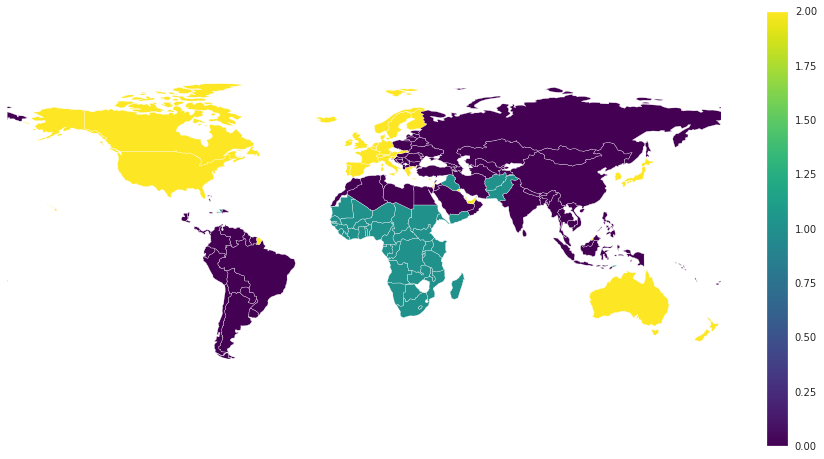

In [56]:
# change column name
world_countries_copy = world_countries.copy()
world_countries_copy.rename(columns = {'name' : 'country'}, inplace = True)
world_countries_copy.head()

# append geodataframe data with data_combined data
world_data = pd.merge(
        raw_dataset,
        world_countries_copy,
        on='country',
        how= 'inner'
)

# convert df into geodf
world_data = gdf(world_data)

# plot 
import geoplot
import mapclassify
cluster = world_data['cluster']


# Note: this code sample requires geoplot>=0.4.0.
geoplot.choropleth(
    world_data, 
    hue=cluster,
    cmap="viridis",
    figsize=(16, 8),
    legend = True
);

**Findings**

* Countries in Cluster 2 (characterised by showing really strong or positive values such as good economic development, high life expectancy, low child mortality) are located in North America, Europe, Oceania and a couple in Asia. 
* Countries in Cluster 1 (characterised by having the most negative values: high child mortality, lowest economic development) are located across Africa and Asia.
* Countries in Cluster 0 (characterised by showing average values for all features when comparing with other clusters) are located across South America, parts of Africa, Europe and Asia.

Blank spaces (like Mexico) are of countries with no available data.

## <a id='7'>7. Further analysis to complement clustering </a>




We've evaluated the results of the clustering by: 

  a) plotting the relationship of features by cluster in Cluster plotting

  b) comparing average values of each feature in Cluster characteristics


Based on an initial assessment of the average values of each cluster, *Cluster 1* could be focus for further analysis. However, when we plot the clusters and look at the graphs, we see that there is overlapping of clusters as well as spread out clusters.

Utilising PCA as an alternative did not result in a significant difference.

We've been able to identify some patters in the data and group countries into 3 clusters. However, we should not rely solely on this result to make the recommendation of countries that should receive funding. There are a few alternatives to explore before we can make this recommendation. 

The implementation of a clustering model in this case did not bring up patterns that we might have not found otherwise, in a way, it only confirmed general knowledge of intuition about this topic. The clustering can be considered as a preprocessing step and further analysis is required. Here are some alternatives to explore:


### <a id='71'>7.1. Dropping features with high correlation</a>



In [57]:
# dataframe without these features 
dataset_w_dropped_features = raw_dataset.drop(['country','life_expec','total_fer','income'], axis =1)
dataset_w_dropped_features.head()

child_mort  exports  health  imports  inflation   gdpp  cluster
0        90.2     10.0    7.58     44.9       9.44    553        1
1        16.6     28.0    6.55     48.6       4.49   4090        0
2        27.3     38.4    4.17     31.4      16.10   4460        0
3       119.0     62.3    2.85     42.9      22.40   3530        1
4        10.3     45.5    6.03     58.9       1.44  12200        0

In [58]:
# scale with standard scaling
cols = dataset_w_dropped_features.columns

# the scaler to use will be 
scaler = StandardScaler()

dataset_w_dropped_features_standard = scaler.fit_transform(dataset_w_dropped_features)
dataset_w_dropped_features_standard

array([[ 1.29153238, -1.13827979,  0.27908825, ...,  0.15733622,
        -0.67917961,  0.36042375],
       [-0.5389489 , -0.47965843, -0.09701618, ..., -0.31234747,
        -0.48562324, -0.89355054],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.78927429,
        -0.46537561, -0.89355054],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.40973191,
        -0.63775406, -0.89355054],
       [ 0.44841668, -0.40647827, -0.59727159, ...,  1.50091625,
        -0.63775406,  0.36042375],
       [ 1.11495062, -0.15034774, -0.33801514, ...,  0.59001454,
        -0.62954556,  0.36042375]])

In [59]:
# standardisation
# we need to create a new dataframe with the column lables and the rescaled values 
df_w_dropped_features = pd.DataFrame(data= dataset_w_dropped_features_standard , columns = cols)
df_w_dropped_features


child_mort   exports    health   imports  inflation      gdpp   cluster
0      1.291532 -1.138280  0.279088 -0.082455   0.157336 -0.679180  0.360424
1     -0.538949 -0.479658 -0.097016  0.070837  -0.312347 -0.485623 -0.893551
2     -0.272833 -0.099122 -0.966073 -0.641762   0.789274 -0.465376 -0.893551
3      2.007808  0.775381 -1.448071 -0.165315   1.387054 -0.516268  0.360424
4     -0.695634  0.160668 -0.286894  0.497568  -0.601749 -0.041817 -0.893551
..          ...       ...       ...       ...        ...       ...       ...
162   -0.225578  0.200917 -0.571711  0.240700  -0.489784 -0.546913 -0.893551
163   -0.526514 -0.461363 -0.695862 -1.213499   3.616865  0.029323 -0.893551
164   -0.372315  1.130305  0.008877  1.380030   0.409732 -0.637754 -0.893551
165    0.448417 -0.406478 -0.597272 -0.517472   1.500916 -0.637754  0.360424
166    1.114951 -0.150348 -0.338015 -0.662477   0.590015 -0.629546  0.360424

[167 rows x 7 columns]

In [60]:
# run the model with the standardised reduced dataset
# method to compute the clusters and assign the labels
y_predicted_reduced = model.fit_predict(df_w_dropped_features) 
y_predicted_reduced

array([8, 3, 7, 0, 4, 7, 7, 5, 5, 7, 3, 9, 7, 3, 4, 9, 4, 8, 4, 7, 3, 3,
       3, 9, 4, 8, 8, 4, 8, 5, 4, 8, 8, 3, 7, 3, 8, 8, 0, 3, 8, 3, 9, 9,
       5, 3, 3, 7, 3, 0, 7, 4, 4, 5, 5, 0, 8, 3, 5, 8, 5, 3, 3, 8, 8, 4,
       8, 4, 5, 7, 7, 7, 3, 9, 5, 5, 7, 5, 4, 7, 8, 1, 9, 4, 8, 4, 3, 1,
       1, 0, 4, 2, 3, 8, 8, 4, 4, 8, 2, 0, 4, 1, 1, 0, 3, 3, 8, 7, 4, 7,
       5, 5, 8, 6, 5, 0, 8, 4, 4, 7, 7, 3, 5, 9, 3, 7, 8, 3, 7, 8, 3, 4,
       8, 2, 9, 9, 4, 3, 9, 5, 7, 3, 8, 3, 5, 5, 3, 8, 4, 8, 8, 3, 4, 3,
       0, 8, 3, 9, 5, 5, 3, 7, 4, 7, 4, 7, 8], dtype=int32)

In [61]:
# add the cluster column to the dataframe 
df_w_dropped_features['cluster'] = y_predicted_reduced
df_w_dropped_features.head()

child_mort   exports    health   imports  inflation      gdpp  cluster
0    1.291532 -1.138280  0.279088 -0.082455   0.157336 -0.679180        8
1   -0.538949 -0.479658 -0.097016  0.070837  -0.312347 -0.485623        3
2   -0.272833 -0.099122 -0.966073 -0.641762   0.789274 -0.465376        7
3    2.007808  0.775381 -1.448071 -0.165315   1.387054 -0.516268        0
4   -0.695634  0.160668 -0.286894  0.497568  -0.601749 -0.041817        4

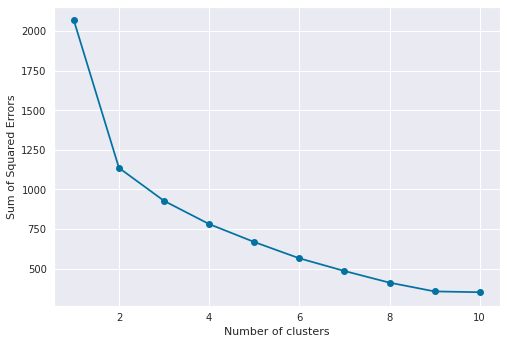

In [62]:
# calculate Sum of Squared Errors (SSE), also called distorsions, for a range of number of cluster - with df scaled with StandardScaler + PCA
error = []
for i in range(1, 11):
    model = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    model.fit(df_w_dropped_features)
    error.append(model.inertia_)

# plot
plt.plot(range(1, 11), error, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors')
plt.show()

**Findings** 

Dropping the features identified as having high correlation earlier in this notebook has resulted in 2 clusters with high inertia. There are no significant changes compared to what we have found in previous steps. 

In [63]:
df_w_dropped_features.cluster.unique()

array([8, 3, 7, 0, 4, 5, 9, 1, 2, 6], dtype=int32)

### <a id='72'>7.2. Further analysis of clusters</a>

Because we've decided to do further analysis of clusters 0 and 1 in `7.4. Further clustering of clusters`, we'll dedicate this step to further analysing cluster 2, to further understand how is it composed and if there are countries in this clusters which might be reconsidered for the final recomendation of funding. 

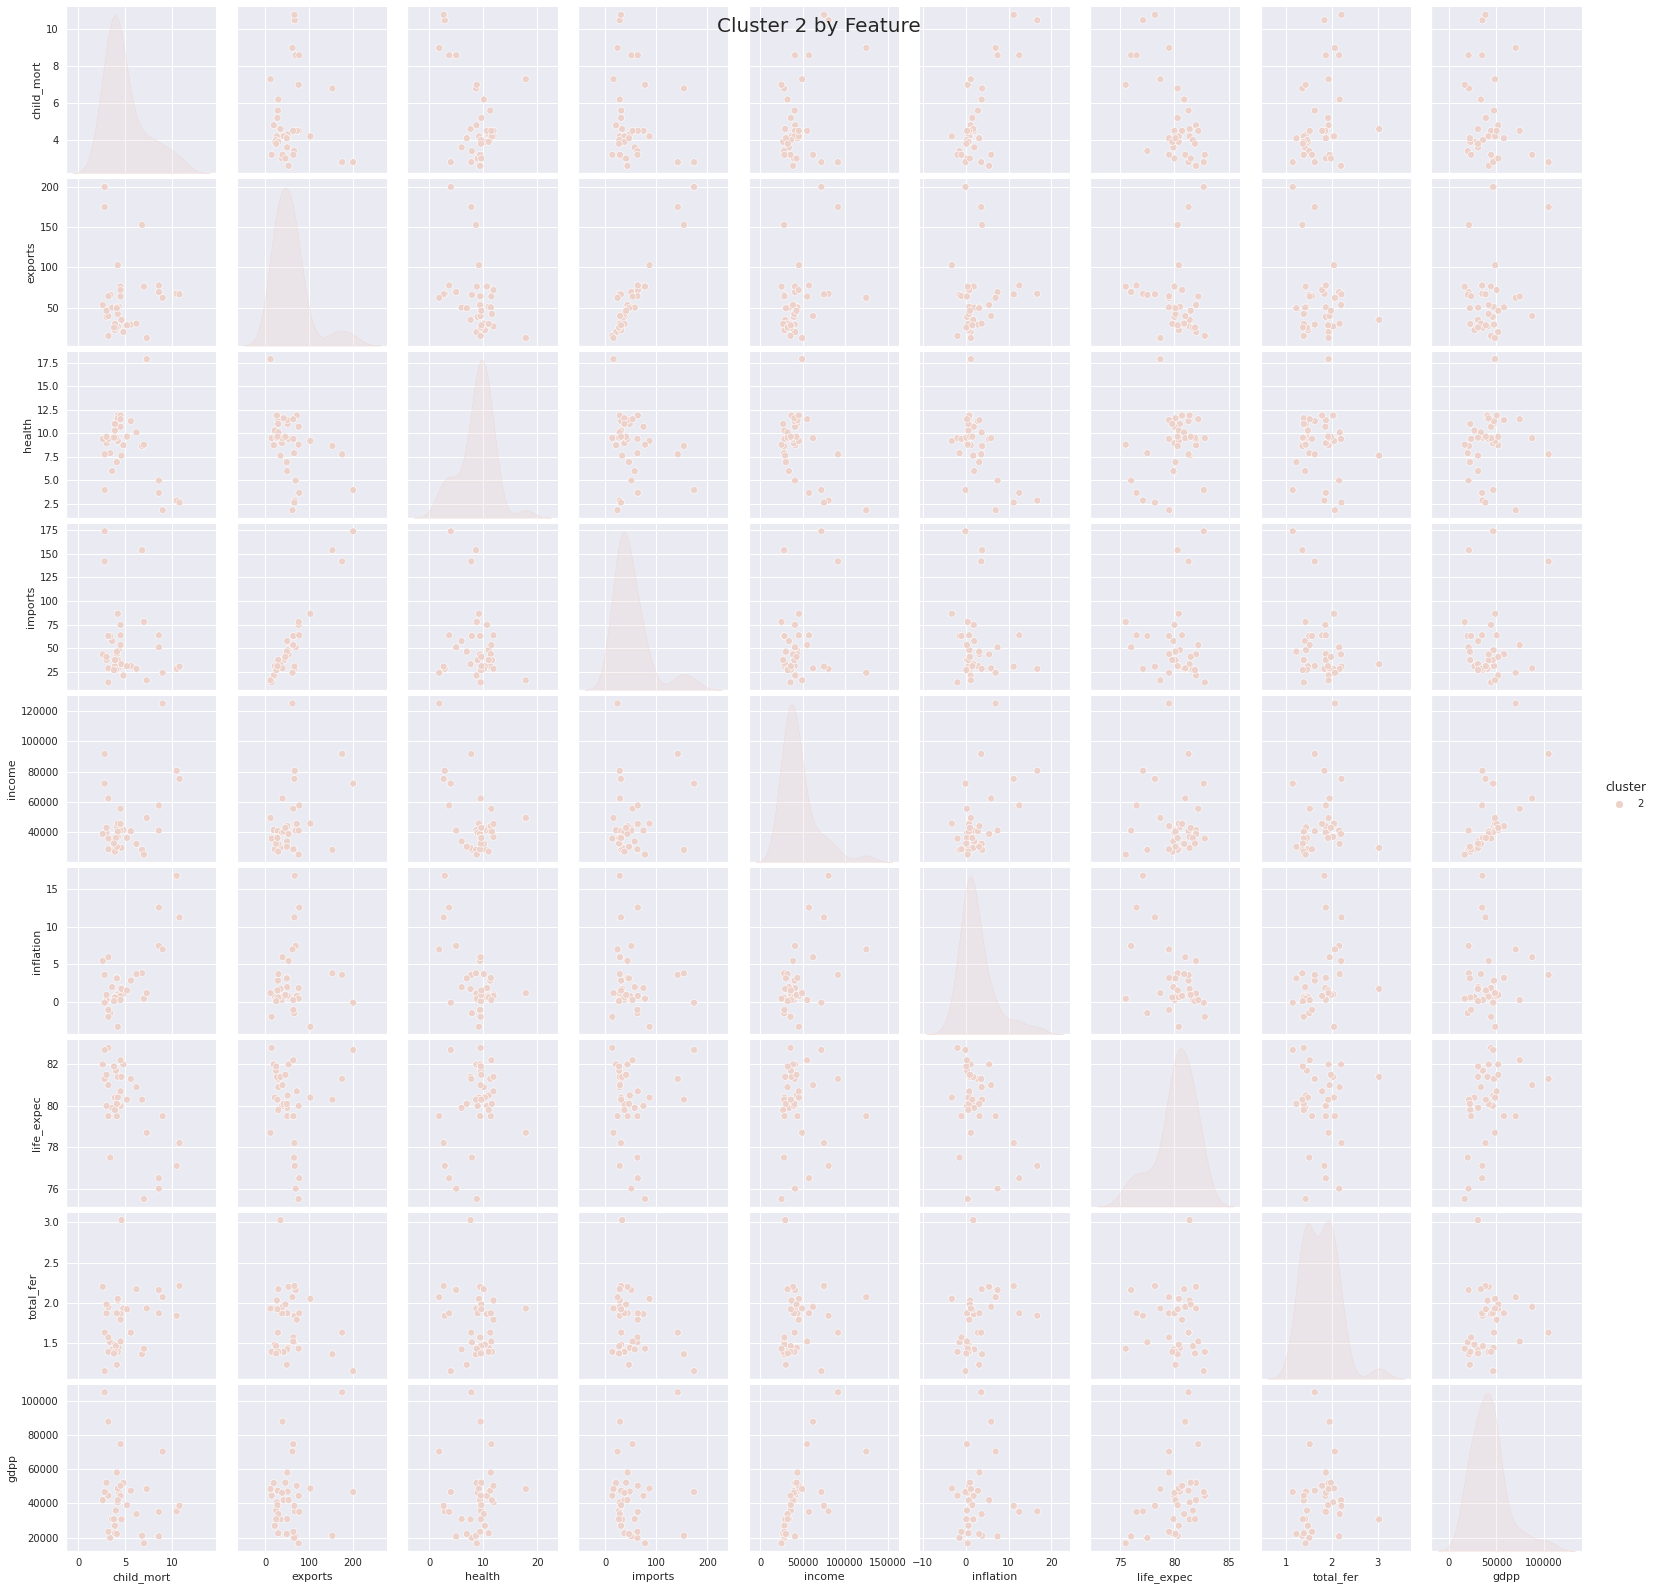

In [64]:
# df cluster 2 
df_w_c2 = raw_dataset[raw_dataset.cluster == 2]

# load example dataset from seaborn 
sns.get_dataset_names()

# plot
sns.load_dataset('penguins')
sns.pairplot(df_w_c2, hue='cluster')

# title
plt.suptitle('Cluster 2 by Feature', 
             size = 20);

**Findings** 

Outliers found in features in this cluster are generally more positive and distant from values from clusters 0 and 1. Countries in this cluster are not going to be considered for funding. 

### <a id='73'>7.3. Linear and Multivariate regression</a>

We identified that there are about 2 or 3 clusters with high levels of overlapping, therefore we need to explore further that can help us answer the question at hand with more supporting evidence. 

For this we'll incorporate a new feature called **Multidimensional Poverty Index (MPI)** from the [Multidimensional Poverty Measures](http://www.kaggle.com/ophi/mpi) dataset. 

*The global Multidimensional Poverty Index (MPI) is an international measure of acute multidimensional poverty covering over 100 developing countries. 
It complements traditional monetary poverty measures by capturing the acute deprivations in health, education, and living standards that a person faces simultaneously. Read more about the MPI [here](http://ophi.org.uk/multidimensional-poverty-index/).*

The MPI will act as the Dependent Variable (DV) and the data we already have been working on will act as the Independent Variables (IV). We'll use Multiple Linear Regression as a way to quantify the relationship between several IV and a DV. 

In [65]:
#import data 
data_path = './cbd-project/mpi'
os.listdir(data_path)

['MPI_subnational.csv', 'MPI_national.csv']

In [66]:
dataset_mpi = pd.read_csv(
    f'{data_path}/MPI_national.csv')

In [67]:
dataset_mpi.head()

ISO     Country  MPI Urban  Headcount Ratio Urban  \
0  KAZ  Kazakhstan      0.000                    0.0   
1  SRB      Serbia      0.000                    0.1   
2  KGZ  Kyrgyzstan      0.000                    0.1   
3  TUN     Tunisia      0.000                    0.1   
4  ARM     Armenia      0.001                    0.2   

   Intensity of Deprivation Urban  MPI Rural  Headcount Ratio Rural  \
0                            33.3      0.000                   0.09   
1                            41.4      0.002                   0.50   
2                            40.2      0.003                   0.70   
3                            35.6      0.012                   3.18   
4                            33.3      0.001                   0.39   

   Intensity of Deprivation Rural  
0                            33.3  
1                            40.3  
2                            37.1  
3                            38.7  
4                            36.9

**Feature Description** 

* ISO: Unique ID for country
* Country: country name
* MPI Urban: Multi-dimensional poverty index for urban areas within the country
* Headcount Ratio Urban: Poverty headcount ratio (% of population listed as poor) within urban areas within the country
* Intensity of Deprivation Urban: Average distance below the poverty line of those listed as poor in urban areas
* MPI Rural: Multi-dimensional poverty index for rural areas within the country
* Headcount Ratio Rural: Poverty headcount ratio (% of population listed as poor) within rural areas within the country
* Intensity of Deprivation Rural: Average distance below the poverty line of those listed as poor in rural areas


For the purpose of this analysis we will focus on **MPI Urban** and **MPI Rural**. This is because the MPI measure reflects both:

a) the incidence of poverty (the percentage of the population who are poor) and, 

b) the intensity of poverty (the percentage of deprivations suffered by each person or household on average). M0 is calculated by multiplying the incidence (H) by the intensity (A). M0 = H x A.

In [68]:
# drop columns
dataset_reduced_mpi =  dataset_mpi.drop(['ISO','Headcount Ratio Urban','Intensity of Deprivation Urban','Headcount Ratio Rural','Intensity of Deprivation Rural'], axis=1)

# rename column
dataset_reduced_mpi.rename(
    columns = {'Country':'country',
               'MPI Urban':'mpi_urban',
               'MPI Rural':'mpi_rural'
              },
    inplace = True)

# head
dataset_reduced_mpi.head(3)

country  mpi_urban  mpi_rural
0  Kazakhstan        0.0      0.000
1      Serbia        0.0      0.002
2  Kyrgyzstan        0.0      0.003

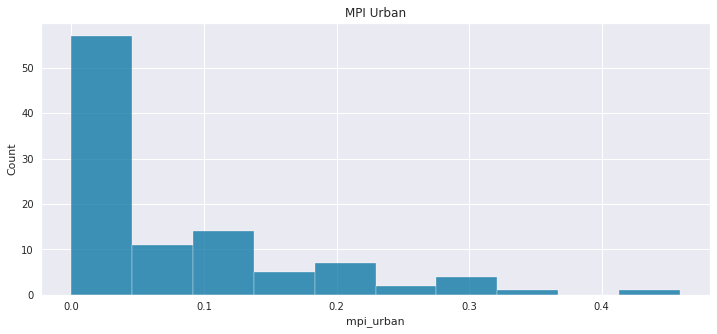

In [69]:
plt.figure(figsize=(12,5))
plt.title('MPI Urban')
ax = sns.histplot(dataset_reduced_mpi['mpi_urban'])

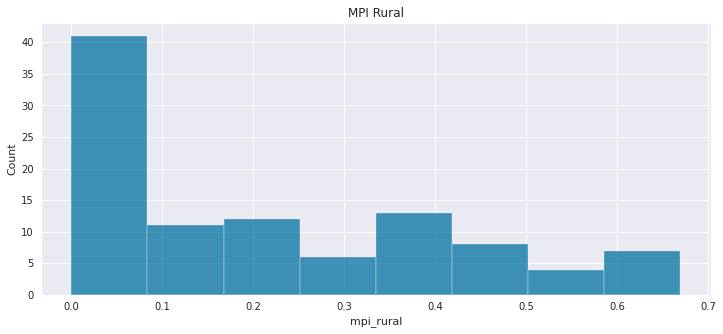

In [70]:
plt.figure(figsize=(12,5))
plt.title('MPI Rural')
ax = sns.histplot(dataset_reduced_mpi['mpi_rural'])

In [71]:
# append data df with mpi_data df
combined_dataset = pd.merge(
    raw_dataset,
    dataset_reduced_mpi,
    on='country',
    how='inner'
)

# check
combined_dataset.head()

country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   
2      Algeria        27.3     38.4    4.17     31.4   12900      16.10   
3      Armenia        18.1     20.8    4.40     45.3    6700       7.77   
4   Azerbaijan        39.2     54.3    5.88     20.7   16000      13.80   

   life_expec  total_fer  gdpp  cluster  mpi_urban  mpi_rural  
0        56.2       5.82   553        1      0.132      0.347  
1        76.3       1.65  4090        0      0.003      0.007  
2        76.5       2.89  4460        0      0.003      0.011  
3        73.3       1.69  3220        0      0.001      0.001  
4        69.1       1.92  5840        0      0.009      0.035

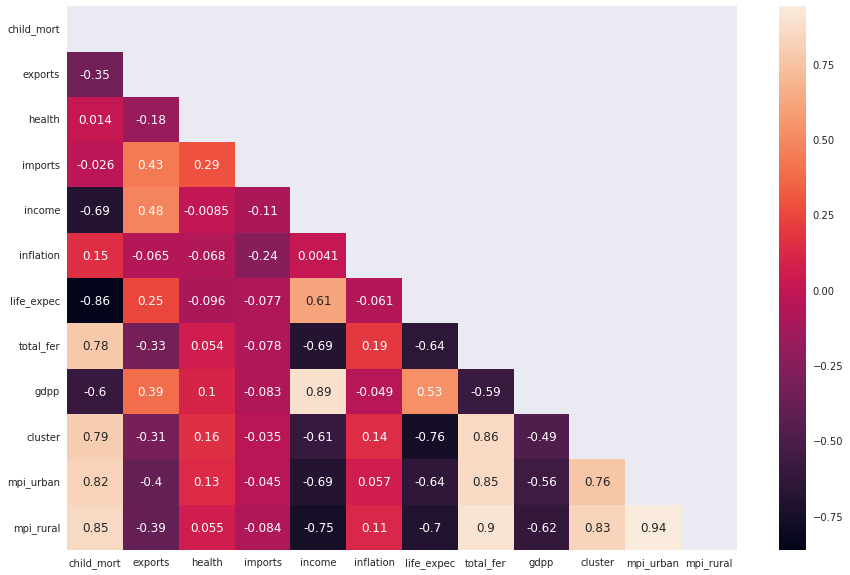

In [72]:
# pearson
plt.figure(figsize=(15,10))
mask = np.triu(combined_dataset.corr())
sns.heatmap(combined_dataset.corr(method='pearson', min_periods=1),annot=True, mask = mask);

**Findings**

MPI urban and rural have high correlation. MPI urban to be considered as DV.
Features with high correlation with MPI urban are child_mort, income, life_expect, total_fer, gdpp.
We'll keep child_mort and not use life_expect and total_fer as they are highly correlated and there might be *multicollinearity* between them. 


### <a id='73a'>7.3.a. Linear regression</a>

We'll run a simple linear regression model for all features (IV) from the original dataset and use MPI urban as the DV.

In [73]:
# create linear regression class object 
regression = linear_model.LinearRegression()

# libraries for plotting of residual plots
import statsmodels.api as sm
from statsmodels.formula.api import ols

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     163.5
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           9.91e-21
Time:                        19:29:01   Log-Likelihood:                 127.06
No. Observations:                  79   AIC:                            -250.1
Df Residuals:                      77   BIC:                            -245.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0230      0.010     -2.388      0.0

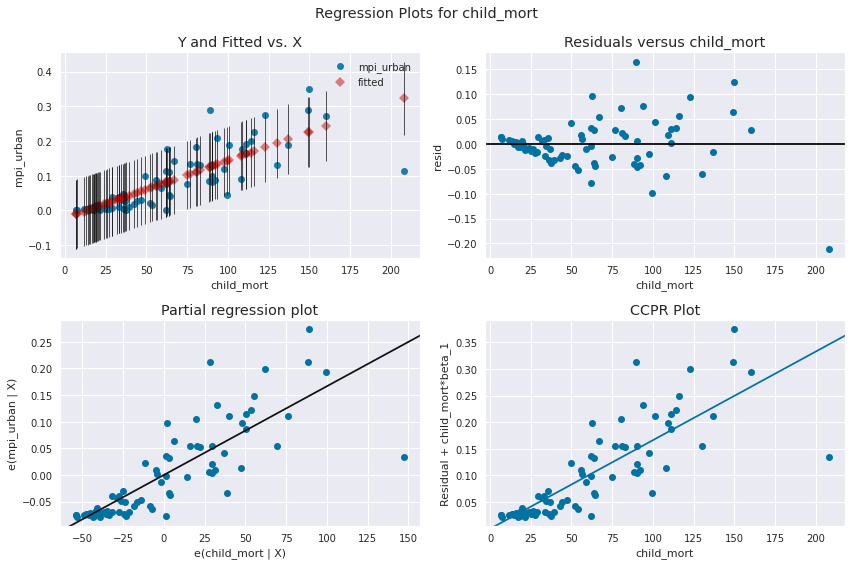

In [74]:
#fit simple linear regression model
model = ols('mpi_urban ~ child_mort', data=combined_dataset).fit()

#view model summary
print(model.summary())

#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'child_mort', fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     14.47
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           0.000284
Time:                        19:29:02   Log-Likelihood:                 88.871
No. Observations:                  79   AIC:                            -173.7
Df Residuals:                      77   BIC:                            -169.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1441      0.020      7.374      0.0

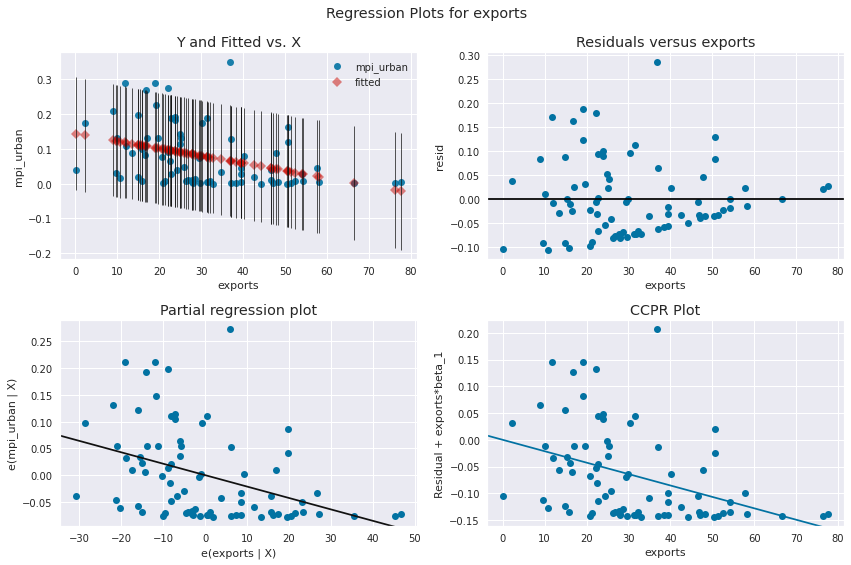

In [75]:

model = ols('mpi_urban ~ exports', data=combined_dataset).fit()

print(model.summary())


fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'exports', fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.293
Date:                Tue, 12 Apr 2022   Prob (F-statistic):              0.259
Time:                        19:29:03   Log-Likelihood:                 82.729
No. Observations:                  79   AIC:                            -161.5
Df Residuals:                      77   BIC:                            -156.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0484      0.028      1.738      0.0

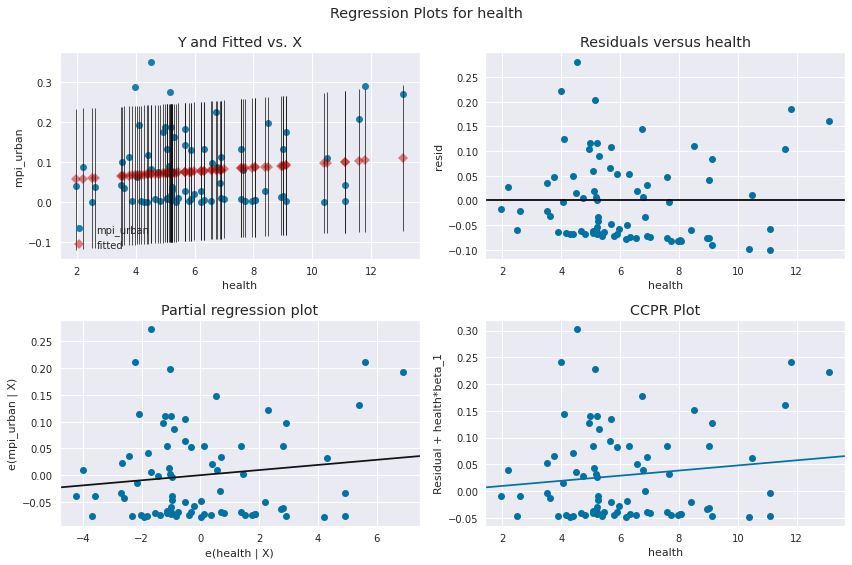

In [76]:

model = ols('mpi_urban ~ health', data=combined_dataset).fit()


print(model.summary())


fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'health', fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1548
Date:                Tue, 12 Apr 2022   Prob (F-statistic):              0.695
Time:                        19:29:05   Log-Likelihood:                 82.150
No. Observations:                  79   AIC:                            -160.3
Df Residuals:                      77   BIC:                            -155.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0871      0.025      3.479      0.0

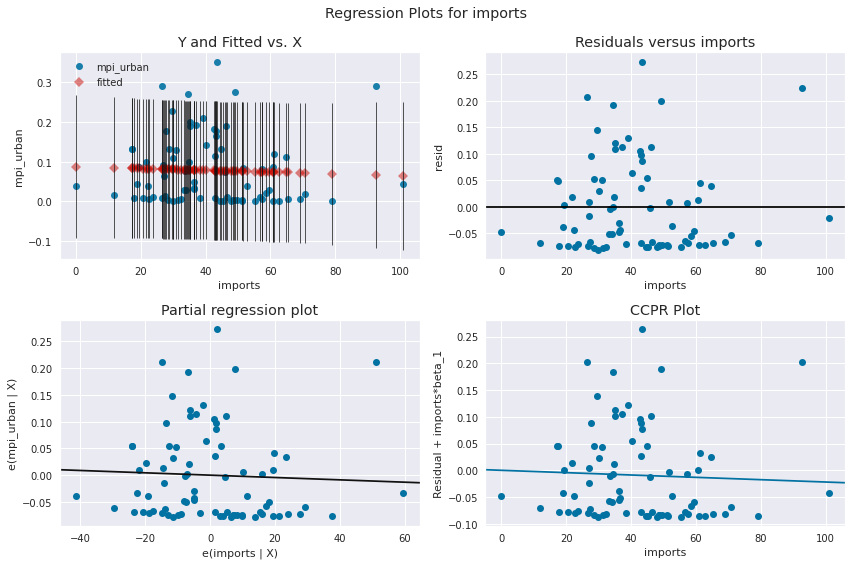

In [77]:

model = ols('mpi_urban ~ imports', data=combined_dataset).fit()


print(model.summary())


fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'imports', fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     69.50
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           2.28e-12
Time:                        19:29:06   Log-Likelihood:                 107.48
No. Observations:                  79   AIC:                            -211.0
Df Residuals:                      77   BIC:                            -206.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1534      0.011     13.366      0.0

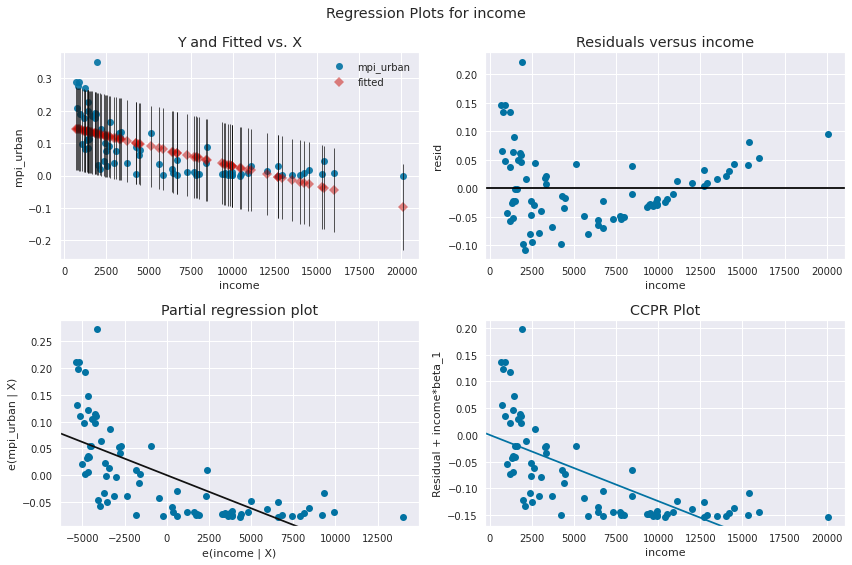

In [78]:

model = ols('mpi_urban ~ income', data=combined_dataset).fit()


print(model.summary())


fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'income', fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2483
Date:                Tue, 12 Apr 2022   Prob (F-statistic):              0.620
Time:                        19:29:08   Log-Likelihood:                 82.198
No. Observations:                  79   AIC:                            -160.4
Df Residuals:                      77   BIC:                            -155.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0744      0.012      6.080      0.0

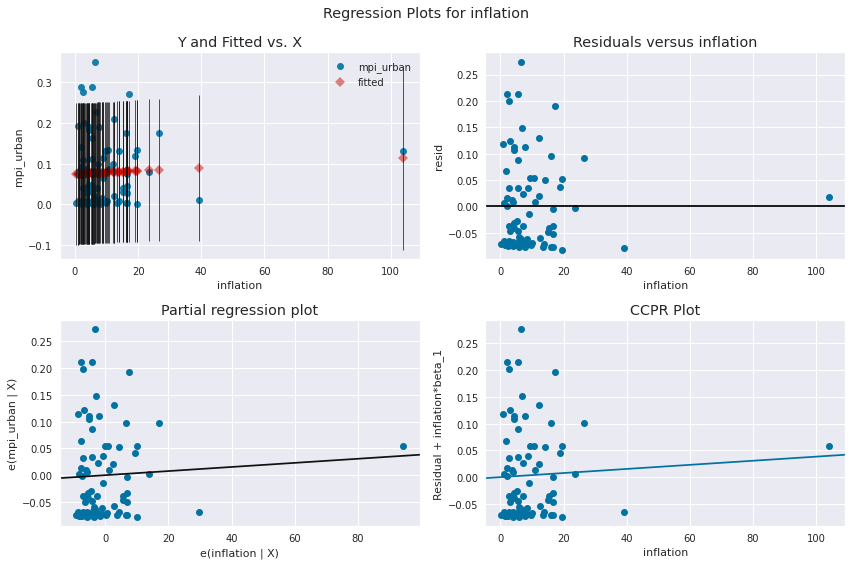

In [79]:

model = ols('mpi_urban ~ inflation', data=combined_dataset).fit()


print(model.summary())


fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'inflation', fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     54.76
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           1.44e-10
Time:                        19:29:09   Log-Likelihood:                 103.29
No. Observations:                  79   AIC:                            -202.6
Df Residuals:                      77   BIC:                            -197.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4971      0.057      8.703      0.0

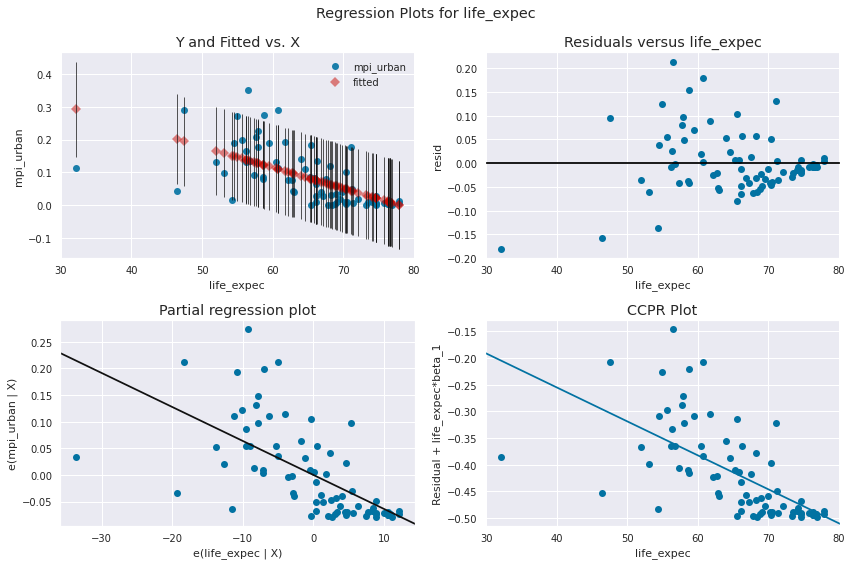

In [80]:

model = ols('mpi_urban ~ life_expec', data=combined_dataset).fit()


print(model.summary())


fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'life_expec', fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     206.9
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           1.60e-23
Time:                        19:29:10   Log-Likelihood:                 133.62
No. Observations:                  79   AIC:                            -263.2
Df Residuals:                      77   BIC:                            -258.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0949      0.013     -7.270      0.0

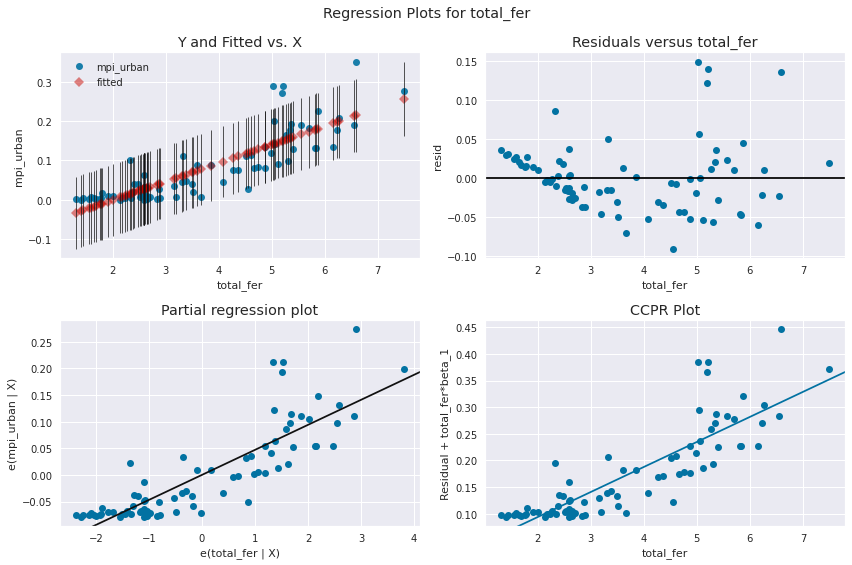

In [81]:

model = ols('mpi_urban ~ total_fer', data=combined_dataset).fit()


print(model.summary())


fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'total_fer', fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     35.62
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           6.90e-08
Time:                        19:29:11   Log-Likelihood:                 97.089
No. Observations:                  79   AIC:                            -190.2
Df Residuals:                      77   BIC:                            -185.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1275      0.012     11.024      0.0

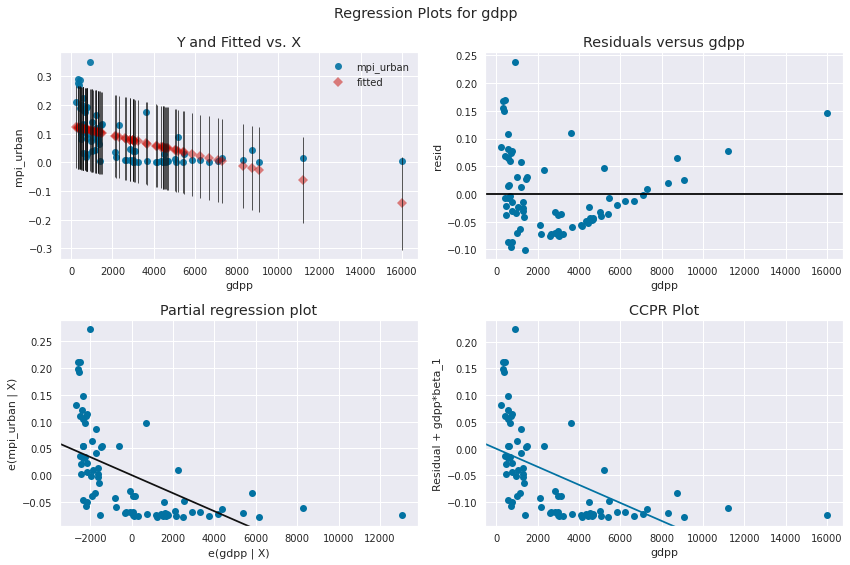

In [82]:
model = ols('mpi_urban ~ gdpp', data=combined_dataset).fit()


print(model.summary())


fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'gdpp', fig=fig)

**Findings**

* Multicollinearity: Income and GDP per Person (gdpp) show high multicollinearity with MPI urban.

* Heteroscedasticity: Based on the interpretation of the 'Residuals vs Feature" plot these are the features that might show heteroscedasticity: child_mort, income, total,fert, life_expec ("cone" shape of fitted values as opposed to randomly scattered).




### <a id='73b'>7.3.b. Multivariate regression</a>

#### With all features of the original dataset

In [83]:
# train model
regression.fit(combined_dataset[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']],combined_dataset.mpi_urban)

LinearRegression()

In [84]:
# accuracy assessment
# R-squared: indicates the proportion of variance in y (mpi_urban), explained by x (other features selected)
regression.score(combined_dataset[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']],combined_dataset.mpi_urban)

0.8348816614462781

In [85]:
# accuracy assessment
# adjusted R-squared: The adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in a regression model.
1 - (1-regression.score(combined_dataset[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']],combined_dataset.mpi_urban))*(len(combined_dataset.mpi_urban)-1)/(len(combined_dataset.mpi_urban)-combined_dataset[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']].shape[1]-1)

0.8133444868523143

#### Without features with multicollinearity and heteroscedasticity

In [86]:
# train model
regression.fit(combined_dataset[['exports','health','imports','inflation','gdpp']],combined_dataset.mpi_urban)

LinearRegression()

In [87]:
# accuracy assessment
# adjusted R-squared: The adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in a regression model.
1 - (1-regression.score(combined_dataset[['exports','health','imports','inflation','gdpp']],combined_dataset.mpi_urban))*(len(combined_dataset.mpi_urban)-1)/(len(combined_dataset.mpi_urban)-combined_dataset[['exports','health','imports','inflation','gdpp']].shape[1]-1)

0.33844769845052813

#### With features with highest R-squared value found on linear regression

In [88]:
# train model
regression.fit(combined_dataset[['child_mort','total_fer']],combined_dataset.mpi_urban)

# accuracy assessment
# adjusted R-squared: The adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in a regression model.
1 - (1-regression.score(combined_dataset[['child_mort','total_fer']],combined_dataset.mpi_urban))*(len(combined_dataset.mpi_urban)-1)/(len(combined_dataset.mpi_urban)-combined_dataset[['child_mort','total_fer']].shape[1]-1)

0.7884629976667908

**Findings**

* With all features of the original dataset: the adjusted R-squared value is >80% which is considered a good result, but we need to consider that there are features included there which show multicolliearity and heteroscedasticity. This means that the model might not have been well-fitted. This is because every time you add a predictor to a model, the R-squared increases, even if due to chance alone. Consequently, a model with more terms may appear to have a better fit simply because it has more terms, but this does not necessarily mean it is the best selection of features.

* Without features with multicollinearity and heteroscedasticity: the adjusted R-squared value significantly decreases to 39% if we only select the features that did not have multicollinearity and heteroscedasticity when running simple linear regression with them. 

* With features with highest R-squared value found on simple linear regression: the adjusted R-squared value is of 79%. Based on initial correlation analysis of these features, they have high positive correlation.

### <a id='74'>7.4. Further clustering of clusters</a>

We can use the findings that we've found so far to narrow our features and run a new clustering model.

We'll include countries listed on clusters 0 and 1 and combine them to work on a new dataset. The features that we will use to cluster this new dataset are 

* child_mort: child mortality is a strong indicator of need for development aid
* gdpp: to include a monetary measure more related to traditional measures of poverty/development 
* MPI urban: captures not only the proportion of the population in poverty but also the intensity of these deprivations

In [89]:
dataset_reduced_mpi.head()

country  mpi_urban  mpi_rural
0  Kazakhstan      0.000      0.000
1      Serbia      0.000      0.002
2  Kyrgyzstan      0.000      0.003
3     Tunisia      0.000      0.012
4     Armenia      0.001      0.001

In [90]:
# append clusters 0 and 1
sub_cluster = cluster_0.append(cluster_1, ignore_index = True)
sub_cluster.head()

country  child_mort  exports  health  imports  income  \
0              Albania        16.6     28.0    6.55     48.6    9930   
1              Algeria        27.3     38.4    4.17     31.4   12900   
2  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
3            Argentina        14.5     18.9    8.10     16.0   18700   
4              Armenia        18.1     20.8    4.40     45.3    6700   

   inflation  life_expec  total_fer   gdpp  cluster  
0       4.49        76.3       1.65   4090        0  
1      16.10        76.5       2.89   4460        0  
2       1.44        76.8       2.13  12200        0  
3      20.90        75.8       2.37  10300        0  
4       7.77        73.3       1.69   3220        0

In [91]:
# append df with cluster 0 and 1 with mpi_data df
sub_cluster_mpi = pd.merge(
    sub_cluster,
    dataset_reduced_mpi,
    on='country',
    how='inner'
)

sub_cluster_mpi.head()

country  child_mort  exports  health  imports  income  inflation  \
0     Albania        16.6     28.0    6.55     48.6    9930       4.49   
1     Algeria        27.3     38.4    4.17     31.4   12900      16.10   
2     Armenia        18.1     20.8    4.40     45.3    6700       7.77   
3  Azerbaijan        39.2     54.3    5.88     20.7   16000      13.80   
4  Bangladesh        49.4     16.0    3.52     21.8    2440       7.14   

   life_expec  total_fer  gdpp  cluster  mpi_urban  mpi_rural  
0        76.3       1.65  4090        0      0.003      0.007  
1        76.5       2.89  4460        0      0.003      0.011  
2        73.3       1.69  3220        0      0.001      0.001  
3        69.1       1.92  5840        0      0.009      0.035  
4        70.4       2.33   758        0      0.100      0.231

In [92]:
# eliminate the column that contains the country information and cluster as only numeric values should be used in this case for unsupervised learning
sub_cluster_data = sub_cluster_mpi.drop(['country','cluster','exports','health','imports','income','inflation','life_expec','total_fer','mpi_rural'], axis =1)


# columns argument ==> we'll use this later to create a new dataframe with the rescaled data 
columns = sub_cluster_data.columns

# the scaler to use will be 
scaler = StandardScaler()

# 'scaler' is for the rescaling technique, 'fit' function is to find the x_min and the x_max, 'transform' function applies formula to all elements of data
sub_cluster_data_standard = scaler.fit_transform(sub_cluster_data)
sub_cluster_data_standard

# we need to create a new dataframe with the column lables and the rescaled values 
df_sub_cluster = pd.DataFrame(data= sub_cluster_data_standard , columns = columns)
df_sub_cluster

child_mort      gdpp  mpi_urban
0    -1.040704  0.405666  -0.876534
1    -0.788697  0.535323  -0.876534
2    -1.005376  0.100798  -0.899892
3    -0.508427  1.018907  -0.806458
4    -0.268196 -0.761944   0.256352
..         ...       ...        ...
74    0.042692  0.233959   1.143974
75    0.695085 -0.856559   0.034446
76    0.476050 -0.819063   0.641766
77   -0.105686 -0.568511   0.022767
78    0.525510 -0.515947   0.606729

[79 rows x 3 columns]

In [93]:
km2 = KMeans (
    n_clusters = 3, # number of clusters/centroids to create
    init = 'random', # ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids
    n_init = 10, # this is the default value. This is the number of times the k-means algorithm will be run with different centroid seeds
    max_iter = 300, # this is the default value. This is the maximum number of iterations of the k-means algorithm for a single run.
    tol = 1e-4, # this is the default value. This is the relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.
    random_state = 0 # this is the default value. Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.
)

In [94]:
# method to compute the clusters and assign the labels
y_predicted_sub_cluster = km2.fit_predict(df_sub_cluster)
y_predicted_sub_cluster

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2,
       2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 0,
       2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [95]:
# add the cluster column to the dataframe 
df_sub_cluster['sub_clusters'] = y_predicted_sub_cluster
df_sub_cluster.head()

child_mort      gdpp  mpi_urban  sub_clusters
0   -1.040704  0.405666  -0.876534             0
1   -0.788697  0.535323  -0.876534             0
2   -1.005376  0.100798  -0.899892             0
3   -0.508427  1.018907  -0.806458             0
4   -0.268196 -0.761944   0.256352             1

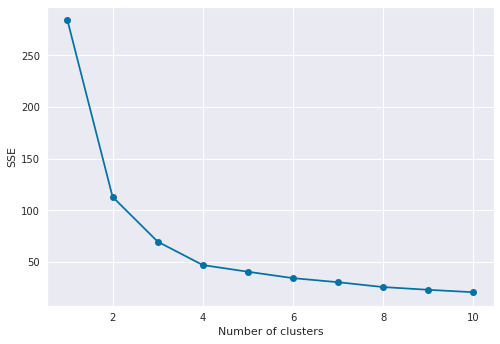

In [96]:
# calculate Sum of Squared Errors (SSE), also called distorsions,  for a range of number of cluster - with df scaled with StandardScaler

sse = []
for i in range(1, 11):
    km2 = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km2.fit(df_sub_cluster)
    sse.append(km2.inertia_)

# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [97]:
# bring dataset with real values
# add cluster column to original dataset with countries and non-scaled values
sub_cluster_mpi['sub_clusters'] = y_predicted_sub_cluster.tolist()
sub_cluster_mpi

country  child_mort  exports  health  imports  income  inflation  \
0       Albania        16.6     28.0    6.55     48.6    9930       4.49   
1       Algeria        27.3     38.4    4.17     31.4   12900      16.10   
2       Armenia        18.1     20.8    4.40     45.3    6700       7.77   
3    Azerbaijan        39.2     54.3    5.88     20.7   16000      13.80   
4    Bangladesh        49.4     16.0    3.52     21.8    2440       7.14   
..          ...         ...      ...     ...      ...     ...        ...   
74  Timor-Leste        62.6      2.2    9.12     27.8    1850      26.50   
75         Togo        90.3     40.2    7.65     57.3    1210       1.18   
76       Uganda        81.0     17.1    9.01     28.6    1540      10.60   
77        Yemen        56.3     30.0    5.18     34.4    4480      23.60   
78       Zambia        83.1     37.0    5.89     30.9    3280      14.00   

    life_expec  total_fer  gdpp  cluster  mpi_urban  mpi_rural  sub_clusters  
0         76.3       1.65  4090        0      0.003      0.007             0  
1         76.5       2.89  4460        0      0.003      0.011             0  
2         73.3       1.69  3220        0      0.001      0.001             0  
3         69.1       1.92  5840        0      0.009      0.035             0  
4         70.4       2.33   758        0      0.100      0.231             1  
..         ...        ...   ...      ...        ...        ...           ...  
74        71.1       6.23  3600        1      0.176      0.414             1  
75        58.7       4.87   488        1      0.081      0.356             1  
76        56.8       6.15   595        1      0.133      0.408             1  
77        67.5       4.67  1310        1      0.080      0.304             1  
78        52.0       5.40  1460        1      0.130      0.380             1  

[79 rows x 14 columns]

In [98]:
# bring dataset with real values
# add cluster column to original dataset with countries and non-scaled values
# eliminate the column that contains the country information and cluster as only numeric values should be used in this case for unsupervised learning
sub_cluster_narrow = sub_cluster_mpi.drop(['exports','health','cluster','imports','income','inflation','life_expec','total_fer','mpi_rural'], axis =1)
sub_cluster_narrow.head()

country  child_mort  gdpp  mpi_urban  sub_clusters
0     Albania        16.6  4090      0.003             0
1     Algeria        27.3  4460      0.003             0
2     Armenia        18.1  3220      0.001             0
3  Azerbaijan        39.2  5840      0.009             0
4  Bangladesh        49.4   758      0.100             1

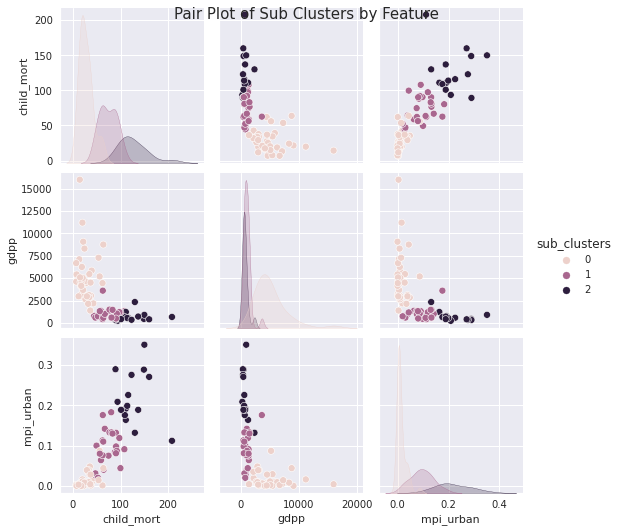

In [99]:
# load example dataset from seaborn 
sns.get_dataset_names()

# plot
sns.load_dataset('penguins')
sns.pairplot(sub_cluster_narrow, hue="sub_clusters")

# title
plt.suptitle('Pair Plot of Sub Clusters by Feature', 
             size = 15);

/opt/conda/lib/python3.7/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


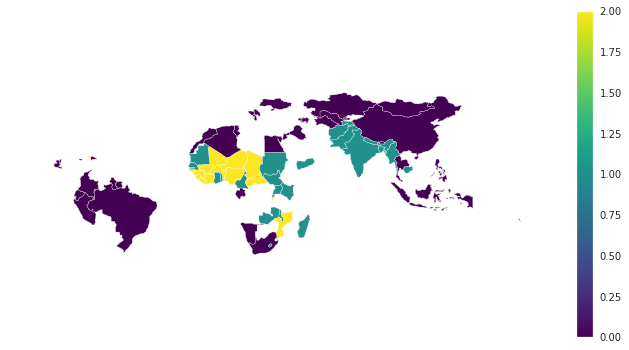

In [100]:
# change column name
world_countries_copy = world_countries.copy()
world_countries_copy.rename(columns = {'name' : 'country'}, inplace = True)
world_countries_copy.head()

# append geodataframe data with data_combined data
combined_world_data = pd.merge(
        sub_cluster_narrow,
        world_countries_copy,
        on='country',
        how= 'inner'
)

# convert df into geodf
combined_world_data = gdf(combined_world_data)

# plot 
import geoplot
import mapclassify
clusters = combined_world_data['sub_clusters']


# Note: this code sample requires geoplot>=0.4.0.
geoplot.choropleth(
    combined_world_data, 
    hue=clusters,
    cmap='viridis', 
    figsize=(12, 6),
    legend = True
);

In [101]:
# sub_cluster 0 
sub_cluster_0 = sub_cluster_narrow.loc[sub_cluster_narrow['sub_clusters'] == 0]

# list of countries in this country
sub_cluster_0.country.unique()

array(['Albania', 'Algeria', 'Armenia', 'Azerbaijan', 'Barbados',
       'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Brazil', 'China',
       'Colombia', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Guatemala', 'Guyana', 'Indonesia', 'Jamaica',
       'Jordan', 'Kazakhstan', 'Maldives', 'Mongolia', 'Montenegro',
       'Morocco', 'Peru', 'Philippines', 'Serbia', 'Suriname', 'Thailand',
       'Tunisia', 'Turkmenistan', 'Ukraine', 'Uzbekistan', 'Vanuatu',
       'Gabon', 'Iraq', 'Namibia', 'South Africa'], dtype=object)

#### Look for additional countries from other clusters

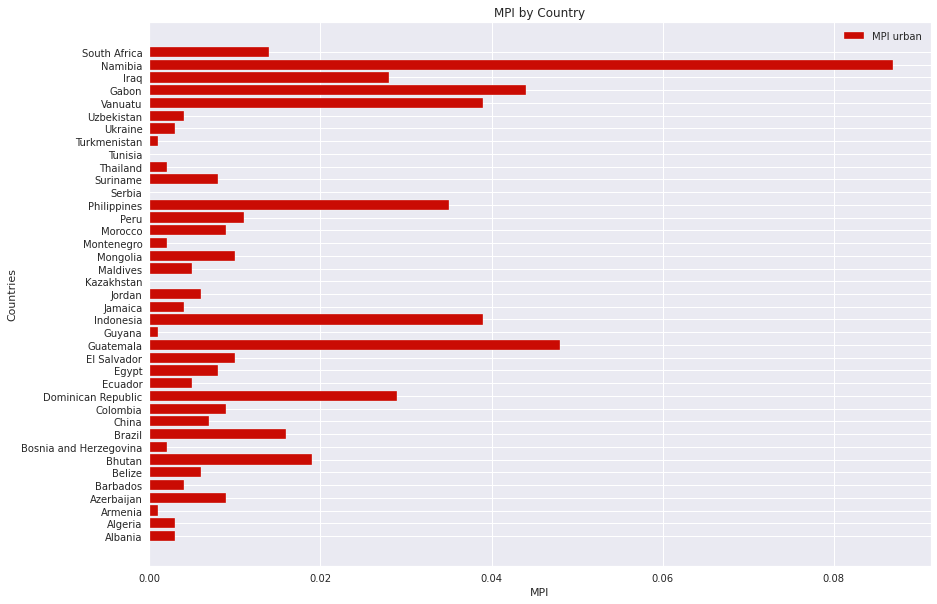

In [102]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[14, 10])

# Passing the parameters to the bar function, this is the main function which creates the bar plot
# For creating the horizontal make sure that you append 'h' to the bar function name
plt.barh(sub_cluster_0['country'], sub_cluster_0['mpi_urban'], label = "MPI urban", color = 'r')
# Creating the legend of the bars in the plot
plt.legend()
# Namimg the x and y axis
plt.xlabel('MPI')
plt.ylabel('Countries')
# Giving the tilte for the plot
plt.title('MPI by Country')

# Displaying the bar plot
plt.show()

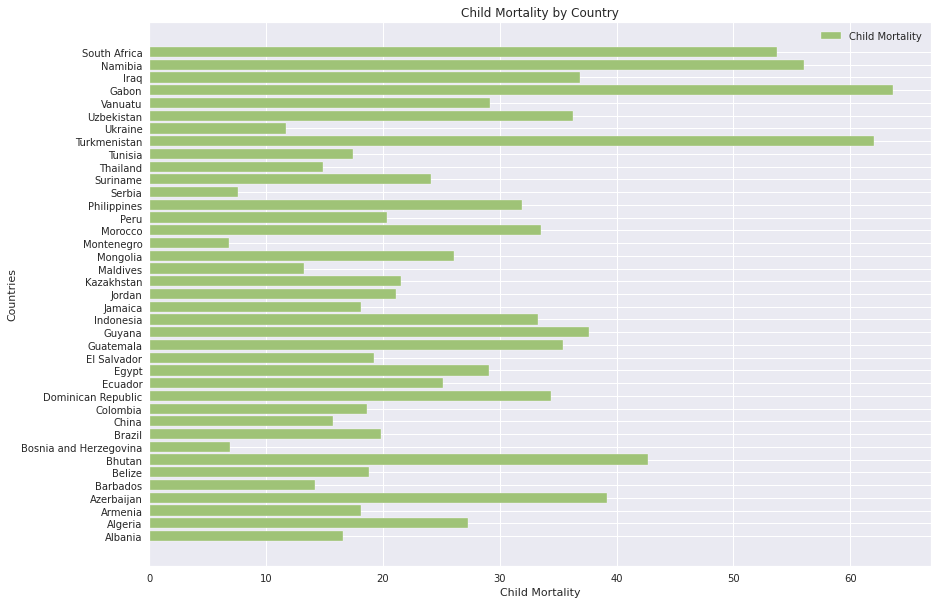

In [103]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[14, 10])

# Passing the parameters to the bar function, this is the main function which creates the bar plot
plt.barh(sub_cluster_0['country'], sub_cluster_0['child_mort'], label = "Child Mortality", color = 'g')
# Creating the legend of the bars in the plot
plt.legend()
# Namimg the x and y axis
plt.xlabel('Child Mortality')
plt.ylabel('Countries')
# Giving the tilte for the plot
plt.title('Child Mortality by Country')

# Displaying the bar plot
plt.show()

In [104]:
# sub_cluster 1 
sub_cluster_1 = sub_cluster_narrow.loc[sub_cluster_narrow['sub_clusters'] == 1]

# list of countries in this country
sub_cluster_1.country.unique()

array(['Bangladesh', 'Cambodia', 'India', 'Myanmar', 'Nepal',
       'Tajikistan', 'Afghanistan', 'Cameroon', 'Comoros', 'Gambia',
       'Ghana', 'Kenya', 'Lesotho', 'Madagascar', 'Malawi', 'Mauritania',
       'Pakistan', 'Rwanda', 'Senegal', 'Sudan', 'Timor-Leste', 'Togo',
       'Uganda', 'Yemen', 'Zambia'], dtype=object)

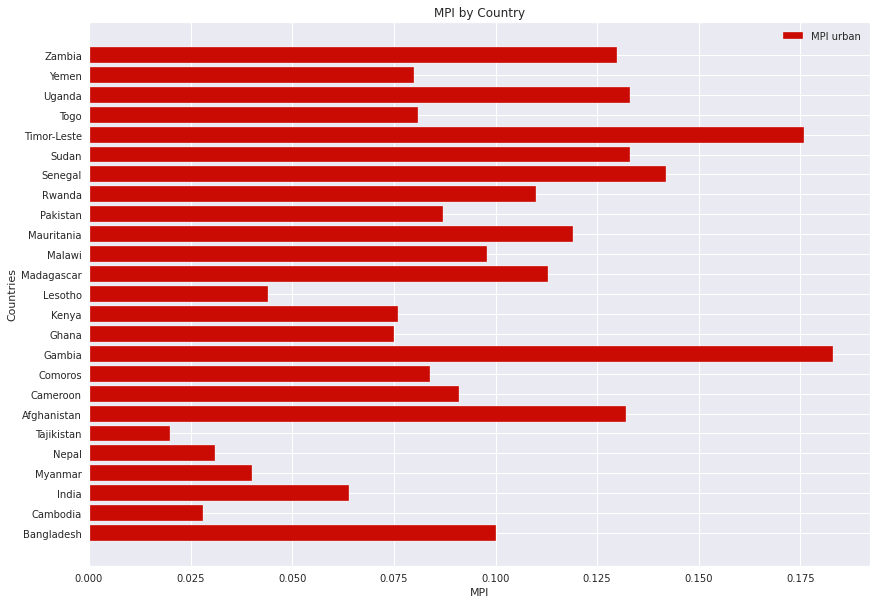

In [105]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[14, 10])

# Passing the parameters to the bar function, this is the main function which creates the bar plot
# For creating the horizontal make sure that you append 'h' to the bar function name
plt.barh(sub_cluster_1['country'], sub_cluster_1['mpi_urban'], label = "MPI urban", color = 'r')
# Creating the legend of the bars in the plot
plt.legend()
# Namimg the x and y axis
plt.xlabel('MPI')
plt.ylabel('Countries')
# Giving the tilte for the plot
plt.title('MPI by Country')

# Displaying the bar plot
plt.show()

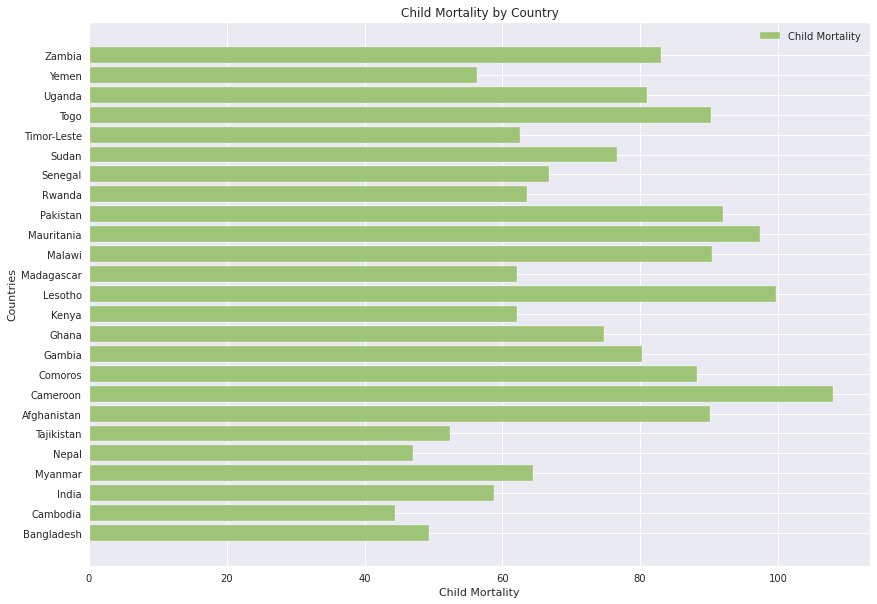

In [106]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[14, 10])

# Passing the parameters to the bar function, this is the main function which creates the bar plot
# For creating the horizontal make sure that you append 'h' to the bar function name
plt.barh(sub_cluster_1['country'], sub_cluster_1['child_mort'], label = "Child Mortality", color = 'g')
# Creating the legend of the bars in the plot
plt.legend()
# Namimg the x and y axis
plt.xlabel('Child Mortality')
plt.ylabel('Countries')
# Giving the tilte for the plot
plt.title('Child Mortality by Country')

# Displaying the bar plot
plt.show()

In [107]:
# sub_cluster 2 
sub_cluster_2 = sub_cluster_narrow.loc[sub_cluster_narrow['sub_clusters'] == 2]

# list of countries in this country
sub_cluster_2.country.unique()

array(['Benin', 'Burkina Faso', 'Burundi', 'Central African Republic',
       'Chad', "Cote d'Ivoire", 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Liberia', 'Mali', 'Mozambique', 'Niger', 'Nigeria',
       'Sierra Leone'], dtype=object)

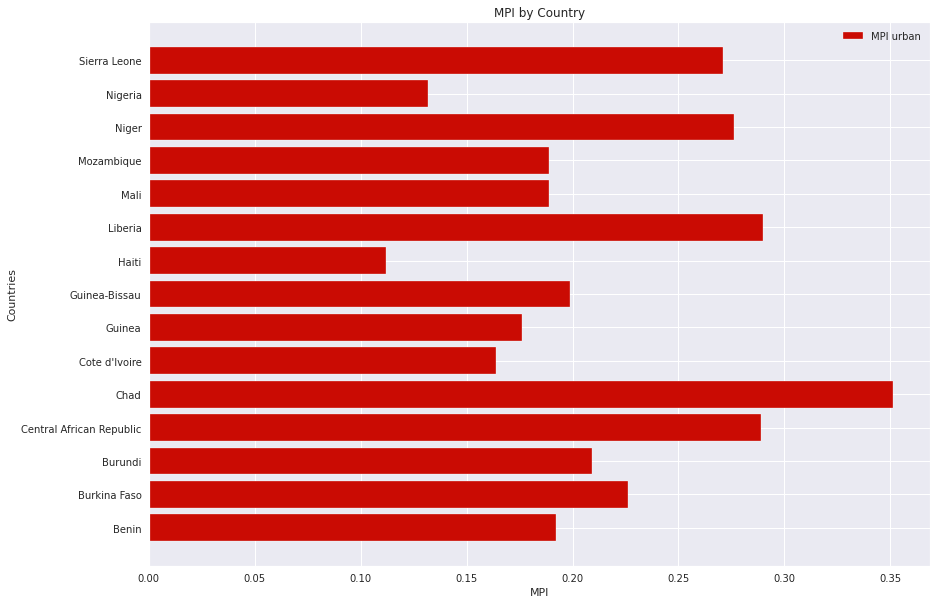

In [108]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[14, 10])

# Passing the parameters to the bar function, this is the main function which creates the bar plot
# For creating the horizontal make sure that you append 'h' to the bar function name
plt.barh(sub_cluster_2['country'], sub_cluster_2['mpi_urban'], label = "MPI urban", color = 'r')
# Creating the legend of the bars in the plot
plt.legend()
# Namimg the x and y axis
plt.xlabel('MPI')
plt.ylabel('Countries')
# Giving the tilte for the plot
plt.title('MPI by Country')

# Displaying the bar plot
plt.show()


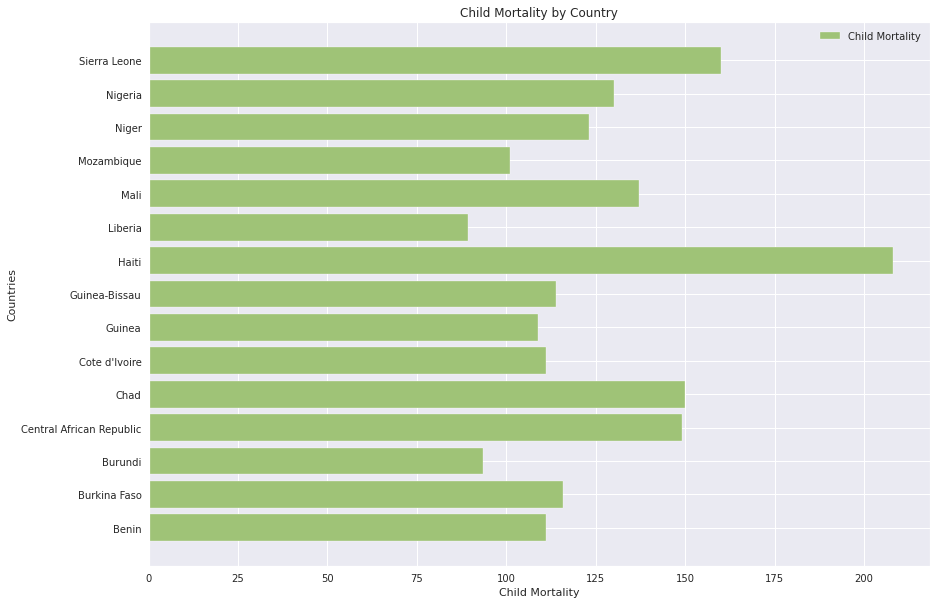

In [109]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[14, 10])

# Passing the parameters to the bar function, this is the main function which creates the bar plot
# For creating the horizontal make sure that you append 'h' to the bar function name
plt.barh(sub_cluster_2['country'], sub_cluster_2['child_mort'], label = "Child Mortality", color = 'g')
# Creating the legend of the bars in the plot
plt.legend()
# Namimg the x and y axis
plt.xlabel('Child Mortality')
plt.ylabel('Countries')
# Giving the tilte for the plot
plt.title('Child Mortality by Country')

# Displaying the bar plot
plt.show()

**Findings**

After completing the clustering of clusters exercise we can see that countries listed on sub_cluster 2 have the most critical measures of child_mortality, MPI and gdpp.


## <a id='8'>8. Answer to the question and learnings</a>

**Answer to the question**

Recommended countries to allocate funding for development aid: 

* Countries listed on sub cluster 2, with most critical results based on MPI, child mortality and GDP/person: Benin, Burkina Faso, Burundi, Central African Republic, Chad, Cote d'Ivoire, Gambia, Guinea, Guinea-Bissau,Haiti, Mali, Mozambique, Niger, Nigeria, Sierra Leone.

* Countries listed on sub clusters 0 and 1, with critieral results of MPI: Liberia and Tmor-Leste, and child mortality: Cameroon.


**Learnings**

* The clustering method alone was not sufficient to provide a final recommendation, however it did contribute to guide actions for further analysis and explore the data in more detail. 

* Further analysis could be done by adding more features related to the context and constraints that the recommended countries might be facing, or systemic challenges that could hinder funding value. Issues like corruption, political/civic society crisis/ natural disasters and other risks could expand this analysis to develop a more suitable criteria for funding depending on the current context of a country beyond these macro indicators.


## <a id='9'>9. References</a>

**Libraries and Code**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://seaborn.pydata.org/generated/seaborn.load_dataset.html

https://seaborn.pydata.org/generated/seaborn.pairplot.html

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

**Datasets**

Unsupervised Learning on Country Data : https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

Multidimensional Poverty Measures : https://www.kaggle.com/datasets/ophi/mpi


**PCA**

PCA in Python:  https://www.youtube.com/watch?v=Lsue2gEM9D0 , https://www.youtube.com/watch?v=SBYdqlLgbGk

https://builtin.com/data-science/step-step-explanation-principal-component-analysis

https://online.stat.psu.edu/stat505/lesson/11/11.4

**Geopandas**

https://geopandas.org/docs/user_guide/mapping.html

**Similar Cases**

https://upzoning.berkeley.edu/download/Classifying_Neighborhoods_Methodology.pdf


**K-Means Model**

https://www.youtube.com/watch?v=EItlUEPCIzM&list=LL&index=1

https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7

https://developer.squareup.com/blog/so-you-have-some-clusters-now-what/


**Visualisations**

https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

https://towardsdatascience.com/mastering-the-bar-plot-in-python-4c987b459053


**Silhouette Score**

https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html



**Linear Regression**

https://www.statology.org/adjusted-r-squared-in-python/

https://statisticsbyjim.com/regression/interpret-r-squared-regression/

https://www.statology.org/residual-plot-python/

https://www.statology.org/heteroscedasticity-regression/

https://towardsdatascience.com/how-do-you-check-the-quality-of-your-regression-model-in-python-fa61759ff685

**Pearson correlation**

https://www.sciencedirect.com/topics/computer-science/pearson-correlation#:~:text=The%20Pearson%20correlation%20measures%20the,meaning%20a%20total%20positive%20correlation.





